In [ ]:
!pip install mendelai-brat-parser
!pip install stc

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

nltk.download('universal_tagset')

  Created wheel for mendelai-brat-parser: filename=mendelai_brat_parser-0.0.11-py3-none-any.whl size=4945 sha256=f990e2a3a56f9c58553e6d0fc82f01efaed6370735c46bae1f7808784de9fd1a
  Stored in directory: /root/.cache/pip/wheels/7e/40/73/4f68f4fa597be33e250400cd56c28c85862b1cba5b3c7c33f1
Successfully built mendelai-brat-parser
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import regex as re
from collections import Counter
import math

from google.colab import files
import zipfile
import glob

from brat_parser import get_entities_relations_attributes_groups

from nltk.tag import pos_tag, map_tag

from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

from brat_parser import get_entities_relations_attributes_groups

import gensim
import gensim.downloader as api
from gensim.models import Word2Vec

from sklearn.metrics import classification_report
from keras.utils.np_utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from stc import SparseTensorClassifier
from scipy.stats import spearmanr

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score

In [ ]:
# Neural network imports.
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input, Dropout
from keras.layers import TimeDistributed
from keras.layers import Concatenate
from keras.layers import LSTM, GRU, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Model, Input

In [ ]:
# Import the statistics and positions information of the sentences to classify.
print('\nImport sentence_statistic.csv\n')
upload = files.upload()

# Import the BOW of the POS of the sentences to classify.
print('\nImport sentence_POS.csv\n')
upload = files.upload()

# Import the BOW of the simplyfied POS of the sentences to classify.
print('\nImport sentence_simple_POS.csv\n')
upload = files.upload()

# Import the BOW of the dependency tag of the sentences to classify.
print('\nImport sentence_dependency.csv\n')
upload = files.upload()

# Import the statistic relative to the tree of the dependency tag of the sentences to classify.
print('\nImport sentence_dependency_tree_stat.csv\n')
upload = files.upload()

# Import the BOW of the labeled named entity of the sentences to classify.
print('\nImport sentence_named_entity_BOW.csv\n')
upload = files.upload()

# Import the BOW for secific n-grams of the sentences to classify.
print('\nImport essay_BOW_appendix_words.csv\n')
upload = files.upload()

# Import the remaining statistics of the sentences to classify.
print('\nImport remaining_stat.csv\n')
upload = files.upload()

# Import the BOW of the sentences.
print('\nImport all_sentences_claim_premise_BOW.csv\n')
upload = files.upload()


Import sentence_statistic.csv




Import sentence_POS.csv




Import sentence_simple_POS.csv




Import sentence_dependency.csv




Import sentence_dependency_tree_stat.csv




Import sentence_named_entity_BOW.csv




Import essay_BOW_appendix_words.csv




Import remaining_stat.csv




Import all_sentences_claim_premise_BOW.csv



In [ ]:
# Import the data relative to the sentences positions and statistics of the IBM Debater dataset
# (Debater_sentence_statistic.csv).
print('\nImport Debater_sentence_statistic.csv\n')
upload = files.upload()

# Import the BOW of the POS of the sentences to classify.
print('\nImport Debater_sentence_POS.csv\n')
upload = files.upload()

# Import the BOW of the simplyfied POS of the sentences to classify.
print('\nImport Debater_sentence_simple_POS.csv\n')
upload = files.upload()

# Import the BOW of the dependency tag of the sentences to classify.
print('\nImport Debater_sentence_dependency.csv\n')
upload = files.upload()

# Import the statistic relative to the tree of the dependency tag of the sentences to classify.
print('\nImport Debater_sentence_dependency_tree_stat.csv\n')
upload = files.upload()

# Import the BOW of the labeled named entity of the sentences to classify.
print('\nImport Debater_sentence_named_entity_BOW.csv\n')
upload = files.upload()

# Import the BOW for secific n-grams of the sentences to classify.
print('\nImport Debater_BOW_appendix_words.csv\n')
upload = files.upload()

# Import the remaining statistics of the sentences to classify.
print('\nImport Debater_remaining_stat.csv\n')
upload = files.upload()

# Import the BOW of the sentences.
print('\nImport Debater_all_sentence_claim_premise_BOW.csv\n')
upload = files.upload()


Import Debater_sentence_statistic.csv




Import Debater_sentence_POS.csv




Import Debater_sentence_simple_POS.csv




Import Debater_sentence_dependency.csv




Import Debater_sentence_dependency_tree_stat.csv




Import Debater_sentence_named_entity_BOW.csv




Import Debater_BOW_appendix_words.csv




Import Debater_remaining_stat.csv




Import Debater_all_sentence_claim_premise_BOW.csv



In [ ]:
# Import the Stab and Gurevych dataset (2017 version).

uploaded = files.upload()

Saving ArgumentAnnotatedEssays-2.0.zip to ArgumentAnnotatedEssays-2.0.zip


In [ ]:
# Import the premise positions in the articles for the IBM Debater dataset (premise-positions.txt).

uploaded = files.upload()

# Import the claims positions in the articles for the IBM Debater dataset (claim-positions.txt).

uploaded = files.upload()

Saving claim-positions.txt to claim-positions.txt


Saving premise-positions.txt to premise-positions.txt


In [ ]:
# Import the IBM Debater dataset (2015 version).

uploaded = files.upload()

Saving IBM_Debater_(R)_CE-EMNLP-2015.v3.zip to IBM_Debater_(R)_CE-EMNLP-2015.v3.zip


# **Stab and Gurevych Dataset**

In [ ]:
# Function to extract zip file.
# Takes in input the path to the zip file (path_zip) and the one to store the destination directory (path_destination).

def extract_zip(path_zip,path_destination):
  with zipfile.ZipFile(path_zip, 'r') as zip_ref:
    zip_ref.extractall(path_destination)


In [ ]:
# Extract zip file (two zip files one inside the other).

extract_zip('ArgumentAnnotatedEssays-2.0.zip','ArgumentAnnotatedEssays-2.0')

extract_zip('ArgumentAnnotatedEssays-2.0/ArgumentAnnotatedEssays-2.0/brat-project-final.zip','ArgumentAnnotatedEssays')

## **Create and visualize the required Dataframe**

In [ ]:
# Extract the list of text files of the essays in the dataset.
txt_files = sorted(glob.glob("ArgumentAnnotatedEssays/brat-project-final/essay*.txt"))

# Extract the list of text files of the essays in the dataset.
ann_files = sorted(glob.glob("ArgumentAnnotatedEssays/brat-project-final/essay*.ann"))

In [ ]:
# List of text files of the essays.
txt_files[0:5]

['ArgumentAnnotatedEssays/brat-project-final/essay001.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay002.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay003.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay004.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay005.txt']

In [ ]:
# List of the annotated files of the essays.
ann_files[0:5]

['ArgumentAnnotatedEssays/brat-project-final/essay001.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay002.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay003.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay004.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay005.ann']

In [ ]:
# Transfor the ann files into four dictionaries.
ann_disctionaries=[get_entities_relations_attributes_groups(file) for file in ann_files]

# Transform the first dictionary (entities) obtained from each ann file into a dataset.
essay_ann_datasets = [pd.DataFrame.from_dict(entities, orient='index') for entities,_,_,_ in ann_disctionaries]

In [ ]:
# Sort the lists composed of a (entity) dataset for each essay.
essay_ann_datasets=[dataset.sort_values(by='span', key=lambda col: col.map(lambda x: x[0][0])) for dataset in essay_ann_datasets]  

# Add a coloumn into the dataset that identifies the document
for i in range(len(essay_ann_datasets)):
  essay_ann_datasets[i].insert(0,'doc_id',i)

# Create a common dataset
essay_argument_dataset = pd.concat(essay_ann_datasets)

In [ ]:
# Sobstitue the values in the "span" feature (substitute each tuple with its first inner tuple)
for i in range(len(essay_argument_dataset.index)):
  essay_argument_dataset['span'][i]=essay_argument_dataset['span'][i][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
essay_argument_dataset.head()

,doc_id,id,type,span,text
T1,0,T1,MajorClaim,"(503, 575)",we should attach more importance to cooperatio...
T3,0,T3,Claim,"(591, 714)","through cooperation, children can learn about ..."
T4,0,T4,Premise,"(716, 851)",What we acquired from team work is not only ho...
T5,0,T5,Premise,"(853, 1086)","During the process of cooperation, children ca..."
T6,0,T6,Premise,"(1088, 1191)",All of these skills help them to get on well w...


## **IOB and word list of the Corpus**

In [ ]:
# List of texts of the essays
files_text=[open(file).read() for file in txt_files]

In [ ]:
# Get the start and finish points of each argumentative section of each of the text.
# Also get the type of each argumentative section.
# This points are indicated in the "span" coloumn of the Dataframe of the annotation.

sorted_span=[list(essay_argument_dataset.loc[essay_argument_dataset['doc_id'] == i,['span','type']].values) for i in range(len(ann_files))]

In [ ]:
sorted_span[0]

[array([(503, 575), 'MajorClaim'], dtype=object),
 array([(591, 714), 'Claim'], dtype=object),
 array([(716, 851), 'Premise'], dtype=object),
 array([(853, 1086), 'Premise'], dtype=object),
 array([(1088, 1191), 'Premise'], dtype=object),
 array([(1212, 1301), 'Premise'], dtype=object),
 array([(1332, 1376), 'Claim'], dtype=object),
 array([(1387, 1492), 'Premise'], dtype=object),
 array([(1549, 1846), 'Premise'], dtype=object),
 array([(1927, 1992), 'Claim'], dtype=object),
 array([(2154, 2231), 'MajorClaim'], dtype=object)]

In [ ]:
# Tranform the couples of points ((start,end) of each section) to a list (separator of different section).

span_points=[]

for i in range(len(sorted_span)):
  list_points=[sep for sub in sorted_span[i] for sep in sub[0]]
  # Insert starting point of the text
  list_points.insert(0,0)
  list_points.append(len(files_text[i]))
  span_points.append(list_points)

In [ ]:
span_points[0]

[0,
 503,
 575,
 591,
 714,
 716,
 851,
 853,
 1086,
 1088,
 1191,
 1212,
 1301,
 1332,
 1376,
 1387,
 1492,
 1549,
 1846,
 1927,
 1992,
 2154,
 2231,
 2232]

In [ ]:
# Separate the texts at the point indicated for the different sections

split_text=[]

for z in range(len(files_text)):
  split_text.append([files_text[z][i: j] for i, j in zip(span_points[z], span_points[z][1:])])

In [ ]:
split_text[0][0:10]

["Should students be taught to compete or to cooperate?\n\nIt is always said that competition can effectively promote the development of economy. In order to survive in the competition, companies continue to improve their products and service, and as a result, the whole society prospers. However, when we discuss the issue of competition or cooperation, what we are concerned about is not the whole society, but the development of an individual's whole life. From this point of view, I firmly believe that ",
 'we should attach more importance to cooperation during primary education',
 '.\nFirst of all, ',
 'through cooperation, children can learn about interpersonal skills which are significant in the future life of all students',
 '. ',
 'What we acquired from team work is not only how to achieve the same goal with others but more importantly, how to get along with others',
 '. ',
 'During the process of cooperation, children can learn about how to listen to opinions of others, how to com

In [ ]:
# Get the list of the words of each essay and the corresponding labels 
# ( argumentative section, premise or claim indicated through IOB).

Y_IOB=[]
X_essay_word_list=[]

for i in range(len(split_text)):
  
  IOB=[]
  essay_word_list=[]

  # next_type is the next position still not considered in the list of argumentative sections of the essay examined.
  next_type=0

  # Remove title from essay considered (splitted_text)
  no_title=[re.sub(r".*\n\n","",text) for text in split_text[i]]

  # Set boolean value next_token_is_argumentative to false.
  # (first section of each essay is never argumentative, it's the one containing the title).
  next_token_is_argumentative=False

  for section in no_title:

    # Divide the text into token.
    seq=nltk.word_tokenize(section.lower())

    essay_word_list+=seq

    if next_token_is_argumentative:
      if sorted_span[i][next_type][1]=='Premise':
        for token in range(len(seq)):
          IOB+=['P']
      else:
        for token in range(len(seq)):
          IOB+=['C']
      next_type += 1
    else:
      for token in range(len(seq)):
        IOB+=['O']

    # An argumentative section is followed by a non-argumentative section and vice-versa    
    next_token_is_argumentative=not next_token_is_argumentative

  Y_IOB.append(IOB)
  X_essay_word_list.append(essay_word_list)

In [ ]:
for i in range(80,120):
  print(X_essay_word_list[0][i]+" - "+Y_IOB[0][i])

i - O
firmly - O
believe - O
that - O
we - C
should - C
attach - C
more - C
importance - C
to - C
cooperation - C
during - C
primary - C
education - C
. - O
first - O
of - O
all - O
, - O
through - C
cooperation - C
, - C
children - C
can - C
learn - C
about - C
interpersonal - C
skills - C
which - C
are - C
significant - C
in - C
the - C
future - C
life - C
of - C
all - C
students - C
. - O
what - P


## **Find out sentences which contain argumentative section**

In [ ]:
# Get the list of all the sentences.

sentence_list=[]

# Get the list of the id of the essay for each of the sentences of the corpus.
essay_id_list=[]

# Get the list of all the argumentative sections.

arg_sections_list=[]

# List of the number of sentences that are part of an agumentative sections 
# besides the first one.
# One element for each argumentative section.

arg_section_len_list=[]

# Get the list containing the label of each argumentative section.
# The label will be 0 for a claim and 1 for a premise. 

labels_list=[]

# List that contains for all the argumentative sections of the corpus the corresponding
# starting sentence (odered by essay and starting point and starting point in the text). 
argument_to_sentence_map=[]


for essay_id in range(len(X_essay_word_list)):
  sentence=""
  arg_section=""
  argument=False
  # Number of sentences that are part of an agumentative sections besides the first one.
  count_sentences_in_arg_section=0

  for word_id in range(len(X_essay_word_list[essay_id])):
    
    word=X_essay_word_list[essay_id][word_id]
    bio_of_word=Y_IOB[essay_id][word_id]

    if not (bio_of_word=='O'):
      arg_section+=word+" "
      # For each argumentative section found, store the corresponding starting sentence.
      if not argument:
        argument_to_sentence_map.append(len(sentence_list))
        argument=True
        if bio_of_word=='C':
          labels_list.append(0)
        else:
          labels_list.append(1)
    else:
      # Check if it the first word out of an argomentative sections.
      if argument:
        arg_sections_list.append(arg_section)
        arg_section_len_list.append(count_sentences_in_arg_section)
        arg_section=""
        count_sentences_in_arg_section=0
      argument=False

    # Add to the sentence every word that is not a simple \n or the end of the sentence (".").
    if not ( word=="." ):
      sentence+=word+" "
          
    # . is the end of the sentence.       
    if word in [".","?","!"] and ( not sentence==""):
      sentence_list.append(sentence)
      essay_id_list.append(essay_id)
      
      if argument:
        count_sentences_in_arg_section+=1

      sentence=""
    
  if not (arg_section==""):
        arg_sections_list.append(arg_section)
        arg_section_len_list.append(count_sentences_in_arg_section)
        arg_section=""
        count_sentences_in_arg_section=0
        argument=False

  if not (sentence==""):
      sentence_list.append(sentence)
      essay_id_list.append(essay_id)

      if argument:
        count_sentences_in_arg_section+=1

      sentence=""

In [ ]:
len(sentence_list)

6738

In [ ]:
len(argument_to_sentence_map)

6089

In [ ]:
len(labels_list)

6089

In [ ]:
len(arg_sections_list)

6089

In [ ]:
len(arg_section_len_list)

6089

In [ ]:
count=0

for count_sentences in arg_section_len_list:
  if count_sentences>0:
    count+=1

print(count)     

4


## **Select the sections to classify and the labels**

In [ ]:
# Transform the sections in the sequences of their words.
X_sections_word_list=[nltk.word_tokenize(section) for section in arg_sections_list]

In [ ]:
# Extract labels, assign label 1 for the premises and 0 for the claims.

Y=np.array(labels_list)

Y

array([0, 0, 1, ..., 1, 1, 0])

# **Debater Dataset**

## **Claim and premise extraction**

In [ ]:
# Extract a zip file.
def import_zip(source: str, destination =""):
  with zipfile.ZipFile(source, 'r') as zip_ref:
    zip_ref.extractall(destination)

In [ ]:
# Extract the dataset.
import_zip("IBM_Debater_(R)_CE-EMNLP-2015.v3.zip")

In [ ]:
# Read the files containing the labeled claim and premises.
claim_data=open("claim-positions.txt").read()
premise_data=open("premise-positions.txt").read()

In [ ]:
# Create a list which contains as elements the lines in the original document.
claim_lines=claim_data.split("\n")
premise_lines=premise_data.split("\n")

In [ ]:
# Separate each line of the document passed at the character '\t'.
# This character is the one used to separate the various component in each line
# of the document.
# In case of claims, also separate the first line from the rest of the document.
# The first line contains the description of the content of the other lines.

claim_list=[line.split("\t") for line in claim_lines][:-1]
premise_list=[line.split("\t") for line in premise_lines][:-1]

In [ ]:
claim_list[:2]

[['Sentence',
  'Article position in list',
  'Sentence starting point',
  'Sentence ending point'],
 ['exposure to violent video games causes at least a temporary increase in aggression and that this exposure correlates with aggression in the real world',
  '0',
  '418',
  '568']]

In [ ]:
# Create the two dataframes (trainsform the string representing numeric values into integer).

claim_dataframe=pd.DataFrame(claim_list[1:],columns=['sentence','article_id','start','end'])
claim_dataframe=claim_dataframe.astype({'article_id':int,'start':int,'end':int})

premise_dataframe=pd.DataFrame(premise_list[1:],columns=['sentence','article_id','start','end'])
premise_dataframe=premise_dataframe.astype({'article_id':int,'start':int,'end':int})

In [ ]:
claim_dataframe.head()

,sentence,article_id,start,end
0,exposure to violent video games causes at leas...,0,418,568
1,video game violence is not related to serious ...,0,829,907
2,some violent video games may actually have a p...,0,1004,1082
3,exposure to violent video games causes both sh...,0,1442,1577
4,they increase the violent tendencies among youth,0,3900,3948


In [ ]:
# Add the type of argumentative sections into the dataframes.
premise_type=["premise" for p in range(len(premise_list)-1)]
claim_type=["claim" for c in range(len(claim_list)-1)]

claim_dataframe["type"]=claim_type
premise_dataframe["type"]=premise_type

In [ ]:
claim_dataframe.head()

,sentence,article_id,start,end,type
0,exposure to violent video games causes at leas...,0,418,568,claim
1,video game violence is not related to serious ...,0,829,907,claim
2,some violent video games may actually have a p...,0,1004,1082,claim
3,exposure to violent video games causes both sh...,0,1442,1577,claim
4,they increase the violent tendencies among youth,0,3900,3948,claim


In [ ]:
# Concatenate the two dataframes into one.
argumentative_dataframe=pd.concat([claim_dataframe,premise_dataframe])

## **IOB and word list**

In [ ]:
# Extract original articles text.
import_zip("IBM_Debater_(R)_CE-EMNLP-2015.v3/articles.zip","IBM_Debater_(R)_CE-EMNLP-2015.v3")

In [ ]:
# Read the list of articles used in the dataset.
txt_articles = sorted(glob.glob("IBM_Debater_(R)_CE-EMNLP-2015.v3/articles/clean_*.txt"))

articles_text=[open(file).read() for file in txt_articles]

In [ ]:
articles_text[0]

'. \n\nControversies over video games often center on topics such as video game graphic violence, sex and sexism, violent and gory scenes, partial or full nudity, portrayal of criminal behavior, racism, and other provocative and objectionable material. \n\nVideo games have been studied for links to addiction and aggression. Earlier meta-analyses (an analysis of several studies) were conflicting. A 2001 study found that exposure to violent video games causes at least a temporary increase in aggression and that this exposure correlates with aggression in the real world. A decrease in prosocial behavior (caring about the welfare and rights of others) was also noted [REF]. Another 2001 meta-analyses using similar methods[REF] and a more recent 2009 study focusing specifically on serious aggressive behavior[REF] concluded that video game violence is not related to serious aggressive behavior in real life. \n\nMany potential positive effects have been proposed [REF]. Recent research has sugg

In [ ]:
# Get the sorted list of the indicators of the articles used. 
articles_used=sorted(list(set(argumentative_dataframe['article_id'])))

In [ ]:
len(articles_used)

513

In [ ]:
articles_used[:5]

[0, 3, 19, 21, 32]

In [ ]:
# Get the start and finish points of each argumentative section of each of the text.
# Also get the type of each argumentative section.
# This points are indicated in the "start" and "end" coloumns of the Dataframe 
# created containing both types of argumentative sentences (argumentative_dataframe).

sorted_span=[sorted(list(argumentative_dataframe.loc[argumentative_dataframe['article_id'] == article,['start','end','type','article_id']].values), key=lambda element: element[0] ) for article in articles_used]

In [ ]:
len(sorted_span)

513

In [ ]:
sorted_span[0][0:10]

[array([394, 568, 'premise', 0], dtype=object),
 array([394, 670, 'premise', 0], dtype=object),
 array([394, 568, 'premise', 0], dtype=object),
 array([394, 670, 'premise', 0], dtype=object),
 array([394, 670, 'premise', 0], dtype=object),
 array([394, 568, 'premise', 0], dtype=object),
 array([394, 568, 'premise', 0], dtype=object),
 array([394, 568, 'premise', 0], dtype=object),
 array([394, 568, 'premise', 0], dtype=object),
 array([418, 568, 'claim', 0], dtype=object)]

In [ ]:
# Join toghether all the argumentative section relating to the same section of 
# the text.

non_repeated_argumentative=[]

for article in sorted_span:
  non_repeated=[]
  article_id=article[0][3]
  start=article[0][0]
  end=article[0][1]
  argument_type=article[0][2]
  for i in range(1,len(article)):
    if end>article[i][0]:
      start=min(start,article[i][0])
      end=max(end,article[i][1])
      if not argument_type==article[i][2]:
        argument_type="both"
    else:
      non_repeated.append([start,end,argument_type,article_id])
      start=article[i][0]
      end=article[i][1]
      argument_type=article[i][2]
  non_repeated_argumentative.append(non_repeated)

In [ ]:
non_repeated_argumentative[0][0:20]

[[394, 670, 'both', 0],
 [673, 907, 'both', 0],
 [911, 1111, 'both', 0],
 [1323, 1577, 'both', 0],
 [2944, 3540, 'premise', 0],
 [3900, 3948, 'claim', 0],
 [3965, 4215, 'both', 0],
 [4217, 4479, 'premise', 0],
 [5514, 5803, 'both', 0],
 [6679, 7317, 'both', 0],
 [7434, 7830, 'both', 0],
 [7833, 8213, 'premise', 0],
 [8402, 8770, 'premise', 0],
 [8776, 9190, 'both', 0],
 [9192, 9396, 'premise', 0],
 [9713, 9857, 'both', 0],
 [9863, 10296, 'both', 0],
 [10301, 10782, 'both', 0],
 [11201, 11483, 'premise', 0],
 [12724, 13099, 'both', 0]]

In [ ]:
# Number of argumentative section remaining.
sum([len(non_repeated) for non_repeated in non_repeated_argumentative])

2925

In [ ]:
# Tranform the couples of points ((start,end) of each non-repeated section) 
# to a list (separator of different section).
non_repeated_span_points=[]

for i in range(len(non_repeated_argumentative)):
  list_points=[]
  for sect in non_repeated_argumentative[i]:
    list_points.append(sect[0])
    list_points.append(sect[1])
  # Insert starting point of the text
  list_points.insert(0,0)
  list_points.append(len(articles_text[articles_used[i]]))
  non_repeated_span_points.append(list_points)

In [ ]:
non_repeated_span_points[0][0:10]

[0, 394, 670, 673, 907, 911, 1111, 1323, 1577, 2944]

In [ ]:
# Separate the texts at the point indicated for the different sections

split_text=[]

for z in range(len(articles_used)):
  split_text.append([articles_text[articles_used[z]][i: j] for i, j in zip(non_repeated_span_points[z], non_repeated_span_points[z][1:])])

In [ ]:
split_text[0][:10]

['. \n\nControversies over video games often center on topics such as video game graphic violence, sex and sexism, violent and gory scenes, partial or full nudity, portrayal of criminal behavior, racism, and other provocative and objectionable material. \n\nVideo games have been studied for links to addiction and aggression. Earlier meta-analyses (an analysis of several studies) were conflicting. ',
 'A 2001 study found that exposure to violent video games causes at least a temporary increase in aggression and that this exposure correlates with aggression in the real world. A decrease in prosocial behavior (caring about the welfare and rights of others) was also noted [REF',
 ']. ',
 'Another 2001 meta-analyses using similar methods[REF] and a more recent 2009 study focusing specifically on serious aggressive behavior[REF] concluded that video game violence is not related to serious aggressive behavior in real life',
 '. \n\n',
 'Many potential positive effects have been proposed [REF]

In [ ]:
# Remove articles with less than 6 section between argumentative and non argumentative.
not_remove=[i for i in range(len(split_text)) if len(split_text[i])>5]
split_text=[split_text[i] for i in not_remove]
non_repeated_argumentative=[non_repeated_argumentative[i] for i in not_remove]
articles_used=[articles_used[i] for i in not_remove]

In [ ]:
len(split_text)

271

In [ ]:
Y_IOB_Debater=[]
X_article_word_list=[]

for i in range(len(split_text)):
  
  IOB=[]
  article_word_list=[]

  # next_type is the next position still not considered in the list of argumentative sections of the articlele examined.
  next_type=0
  
  # Remove the "[REF]" and "|-" from the text.
  texts=[re.sub(r"\[REF[\]$]*","",text) for text in split_text[i]]
  texts=[re.sub(r"^\]","",text) for text in texts]
  texts=[re.sub(r"|-","",text) for text in texts]

  # Set boolean value next_token_is_argumentative to false.
  # (first section is never argumentative, in case first sentence was argumentative
  # a fake section as been added previously).
  next_token_is_argumentative=False

  for section in texts:

    # Divide the text into token.
    seq=nltk.word_tokenize(section.lower())

    article_word_list+=seq

    if next_token_is_argumentative:
      if non_repeated_argumentative[i][next_type][2]=='premise':
        IOB+=['B-P']
        for token in range(len(seq)-1):
          IOB+=['I-P']
      else:
        if non_repeated_argumentative[i][next_type][2]=='claim':
          IOB+=['B-C']
          for token in range(len(seq)-1):
            IOB+=['I-C']
        else:
          IOB+=['B-B']
          for token in range(len(seq)-1):
            IOB+=['I-B']  
      next_type += 1
    else:
      for token in range(len(seq)):
        IOB+=['O']

    # An argumentative section is followed by a non-argumentative section and vice-versa    
    next_token_is_argumentative=not next_token_is_argumentative

  Y_IOB_Debater.append(IOB)
  X_article_word_list.append(article_word_list)

In [ ]:
for i in range(80,100):
  print(X_article_word_list[0][i]+" - "+Y_IOB_Debater[0][i])

least - I-B
a - I-B
temporary - I-B
increase - I-B
in - I-B
aggression - I-B
and - I-B
that - I-B
this - I-B
exposure - I-B
correlates - I-B
with - I-B
aggression - I-B
in - I-B
the - I-B
real - I-B
world - I-B
. - I-B
a - I-B
decrease - I-B


## **Find out sentences which contain argumentative section**

In [ ]:
# Get the list of sententences of each artile.

articles_Debater_sentence_list=[]

for article_id in range(len(X_article_word_list)):
  temp_article_Debater_sentence_list=[]
  sentence=""

  for word_id in range(len(X_article_word_list[article_id])):
    
    word=X_article_word_list[article_id][word_id]

    # Add to the sentence every word that is not a simple \n or the end of the sentence (".").
    if not ( word=="." ):
      sentence+=word+" "
          
    # . is the end of the sentence.       
    if word in [".","?","!"] and (not sentence==""):
      temp_article_Debater_sentence_list.append(sentence)
      sentence=""
      
  articles_Debater_sentence_list.append(temp_article_Debater_sentence_list)

In [ ]:
sentences_word_list=[[nltk.word_tokenize(sentence) for sentence in article] for article in articles_Debater_sentence_list]

In [ ]:
# Remove articles with sections of more than 150 words.
not_remove=[i for i in range(len(sentences_word_list)) if max([len(sentence) for sentence in sentences_word_list[i]])<=150]
X_article_word_list=[X_article_word_list[i] for i in not_remove]
Y_IOB_Debater=[Y_IOB_Debater[i] for i in not_remove]
split_text=[split_text[i] for i in not_remove]
non_repeated_argumentative=[non_repeated_argumentative[i] for i in not_remove]
articles_used=[articles_used[i] for i in not_remove]

In [ ]:
len(not_remove)

251

In [ ]:
# Get the list of all the sentences.

Debater_sentence_list=[]

# Get the list of the id of the articlele for each of the sentences of the corpus.
article_id_list=[]

# Get the list of all the argumentative sections.

Debater_arg_sections_list=[]

# List of the number of sentences that are part of an agumentative sections 
# besides the first one.
# One element for each argumentative section.

Debater_arg_section_len_list=[]

# Get the list containing the label of each argumentative section.
# The label will be 0 for a claim and 1 for a premise. 

Debater_labels_list=[]

# List that contains for all the argumentative sections of the corpus the corresponding
# starting sentence (odered by article and starting point and starting point in the text). 
Debater_argument_to_sentence_map=[]


for article_id in range(len(X_article_word_list)):
  sentence=""
  arg_section=""
  argument=False
  # Number of sentences that are part of an agumentative sections besides the first one.
  count_sentences_in_arg_section=0

  for word_id in range(len(X_article_word_list[article_id])):
    
    word=X_article_word_list[article_id][word_id]
    bio_of_word=Y_IOB_Debater[article_id][word_id]

    if not (bio_of_word=='O' or bio_of_word=='B-B' or bio_of_word=='I-B'):
      # For each argumentative section found, store the corresponding starting sentence.
      if bio_of_word=='B-C' or bio_of_word=='B-P':
        if not (arg_section==""):
          Debater_arg_sections_list.append(arg_section)
          Debater_arg_section_len_list.append(count_sentences_in_arg_section)
          arg_section=""
          count_sentences_in_arg_section=0
        Debater_argument_to_sentence_map.append(len(Debater_sentence_list))
        argument=True
        if bio_of_word=='B-C':
          Debater_labels_list.append(0)
        else:
          Debater_labels_list.append(1)
      arg_section+=word+" "

    else:
      # Check if it the first word out of an argomentative sections.
      if argument:
        Debater_arg_sections_list.append(arg_section)
        Debater_arg_section_len_list.append(count_sentences_in_arg_section)
        arg_section=""
        count_sentences_in_arg_section=0
      argument=False

    # Add to the sentence every word that is not a simple \n or the end of the sentence (".").
    if not ( word=="." ):
      sentence+=word+" "
          
    # . is the end of the sentence.       
    if word in [".","?","!"] and ( not sentence==""):
      Debater_sentence_list.append(sentence)
      article_id_list.append(article_id)
      
      if argument:
        count_sentences_in_arg_section+=1

      sentence=""
    
  if not (arg_section==""):
        Debater_arg_sections_list.append(arg_section)
        Debater_arg_section_len_list.append(count_sentences_in_arg_section)
        arg_section=""
        count_sentences_in_arg_section=0
        argument=False

  if not (sentence==""):
      Debater_sentence_list.append(sentence)
      article_id_list.append(article_id)
      
      if argument:
        count_sentences_in_arg_section+=1

      sentence=""

In [ ]:
len(Debater_sentence_list)

44936

In [ ]:
len(Debater_argument_to_sentence_map)

2062

In [ ]:
len(Debater_labels_list)

2062

In [ ]:
len(Debater_arg_sections_list)

2062

In [ ]:
len(Debater_arg_section_len_list)

2062

In [ ]:
count=0

for count_sentences in Debater_arg_section_len_list:
  if count_sentences>0:
    count+=1

print(count)     

571


## **Select the sections to classify and the labels**

In [ ]:
# Transform the sections in the sequences of their words.
X_Debater_sections_word_list=[nltk.word_tokenize(section) for section in Debater_arg_sections_list]

In [ ]:
# Extract labels, assign label 1 for the premises and 0 for the claims.

Y_Debater=np.array(Debater_labels_list)

Y_Debater

array([1, 0, 1, ..., 1, 1, 1])

# **Word2vec and one-hot-encoding**

In [ ]:
import gensim
import gensim.downloader as api

path = api.load("word2vec-google-news-300", return_path=True)
print(path)

/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [ ]:
# Load Google Word2Vec model
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)  

In [ ]:
# Get the maximum lenght of the argumentative sections of the articles.

X_sections_word_list=X_sections_word_list+X_Debater_sections_word_list

text_len = [len(text) for text in X_sections_word_list]
MAX_LEN = max(text_len)
print("Max lenght of the argumentative sections: {}".format(MAX_LEN))

Max lenght of the argumentative sections: 264


In [ ]:
text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(X_sections_word_list)
X = text_tokenizer.texts_to_sequences(X_sections_word_list)
X = pad_sequences(X, maxlen=MAX_LEN, padding="pre")

In [ ]:
# Each word in the Word2vec model used is embedded trough a vector of size 300
EMBEDDING_SIZE  = 300

# Size of the vocabulary used
VOCABULARY_SIZE = len(text_tokenizer.word_index) + 1

# Create an empty embedding matix
embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))

# Create a word to index dictionary mapping
word2id = text_tokenizer.word_index

# Copy vectors from word2vec model to the words present in corpus
for word, index in word2id.items():
    try:
        embedding_weights[index, :] = word2vec_model[word]
    except KeyError:
        print(word)

,
to
of
and
a
.
's
``
''
(
)
'
;
:
’
2008
u.s.
]
[
2010
2009
2007
2011
15
10
“
30
”
2000
40
part-time
20
100
2006
12
27
60
25
2002
2001
2003
e-mail
atf
centre
..
14
1999
13
sderot
face-to-face
–
16
2005
70
goldstone
his/her
19
80
2004
1990
onechild
ptsd
well-being
90
28
1996
labour
-
200
1997
—
300
11
‘
50
75
behaviour
20th
1998
1990s
dr.
1979
criticised
merton
high-tech
co-operation
24
85
1980
21
1994
65
1970s
2012
hitchens
dawkins
abstinenceonly
co-operative
co-worker
co-workers
21st
i.e
e.g
?
17
k.
1993
35
26
aquinas
kleck
ashkelon
distance-learning
favour
toefl
learnt
he/she
16yearold
36
18
29
1970
31
1980s
1985
hiv/aids
g.
j.
44
programme
3,000
ehud
tunisia
lipstadt
balanitis
oneloss
travelling
rushdie
organisation
programmes
organisations
group-studying
metaanalyses
1995
22
petric
2.3
1989
51
1930s
1991
hoxby
mahmoud
merkel
400
20,000
43
st.
selfexistence
1977
5.4
1,000
falk
hrw
dershowitz
unrwa
haniyeh
1.5
gazan
aviv
goidel
faurisson
okinawa
governorgeneral
high-quality
co-tenan

# **Split Train and Test set Stab and Gurevych**

In [ ]:
# Create a list of values between 0 and 401, where each value indicate an essay
# in the corpus.

essay_id_list=[i for i in range(402)]

In [ ]:
# Divide the corpus (documents containing the essay) in test and train test.
train_set,test_set=train_test_split(essay_id_list,test_size=0.15,random_state=42)

In [ ]:
print(len(train_set))

train_set[:10]

341


[253, 282, 78, 101, 31, 274, 222, 233, 73, 287]

In [ ]:
print(len(test_set))

test_set[:10]

61


[285, 281, 33, 211, 93, 84, 391, 94, 225, 126]

In [ ]:
X_argumentative_sections_doc=list(essay_argument_dataset['doc_id'])

sections_train_set=[]
sections_test_set=[]

for i in range(len(X_argumentative_sections_doc)):
  if X_argumentative_sections_doc[i] in test_set:
    sections_test_set.append(i)
  else:
    sections_train_set.append(i)

In [ ]:
len(sections_test_set)

900

In [ ]:
len(sections_train_set)

5189

# **Split Train and Test set Debater**

In [ ]:
X_argumentative_sections_doc=[]
for article in non_repeated_argumentative:
  for section in article:
    if not section[2]=='both':
      X_argumentative_sections_doc.append(section[3])

print(len(X_argumentative_sections_doc))     

2062


In [ ]:
# Create a list of values of articles' id, where each value indicate an article
# in the corpus.

article_id_list=list(set(X_argumentative_sections_doc))

In [ ]:
# Divide the corpus (documents containing the essay) in test and train test.
train_set,test_set=train_test_split(article_id_list,test_size=0.25,random_state=42)

In [ ]:
print(len(train_set))

train_set[:10]

188


[798, 673, 419, 783, 818, 386, 625, 1214, 633, 686]

In [ ]:
print(len(test_set))

test_set[:10]

63


[806, 520, 313, 1116, 689, 853, 389, 506, 528, 1215]

In [ ]:
Debater_sections_train_set=[]
Debater_sections_test_set=[]

for i in range(len(X_argumentative_sections_doc)):
  if X_argumentative_sections_doc[i] in test_set:
    Debater_sections_test_set.append(i)
  else:
    Debater_sections_train_set.append(i)

In [ ]:
len(Debater_sections_test_set)

514

In [ ]:
len(Debater_sections_train_set)

1548

# **RNN**

In [ ]:
# Create and train recurrent models.

# Bidirectional LSTM model.

def train_BLSTM(X_train:np.ndarray, Y_train:np.ndarray)->Model:

  # Create the BLSTM model.
  input = Input(shape=(MAX_LEN,))

  model = Embedding(input_dim=VOCABULARY_SIZE, output_dim=EMBEDDING_SIZE, input_length=MAX_LEN, weights= [embedding_weights], trainable=True, mask_zero=True)(input)
  model = Bidirectional(LSTM(32))(model)
  model = Dropout(0.3)(model)
  output = Dense(1, activation='sigmoid')(model)

  final_model=Model(input,output)

  final_model.compile(loss='binary_crossentropy',
                  optimizer='nadam',
                  metrics=['acc'])
    
  training_results= final_model.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.15, verbose=False, callbacks=[EarlyStopping("val_loss", mode='min', patience=2),])

  # visualise training history.
  plt.plot(training_results.history['acc'])
  plt.plot(training_results.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc="lower right")
  plt.show()

  return final_model

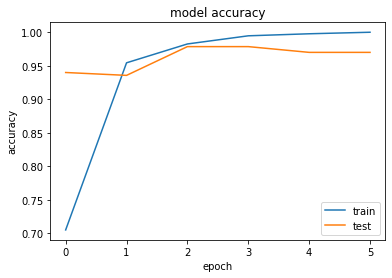

In [ ]:
target_names=['Claim','Premise']
 
y_pred_Debater=[]
y_true_Debater=[]

X_sg,X_Debater=X[:len(labels_list)], X[len(labels_list):]

X_train, X_test = X_Debater[Debater_sections_train_set], X_Debater[Debater_sections_test_set]

Y_train, Y_test = Y_Debater[Debater_sections_train_set], Y_Debater[Debater_sections_test_set]

# Train the model.
model=train_BLSTM(X_train,Y_train)

# Transform probabilities predicted in the most probable value (0 or 1).
y_pred_temp=model.predict(X_test).tolist()
for input in y_pred_temp:
  y_pred_Debater.append(round(input[0]))
y_true_Debater+=Y_test.tolist()

In [ ]:
# Print the classification report of the result of the models created
print(classification_report(y_true_Debater, y_pred_Debater, target_names=target_names))   

              precision    recall  f1-score   support

       Claim       0.96      0.96      0.96       222
     Premise       0.97      0.97      0.97       292

    accuracy                           0.97       514
   macro avg       0.97      0.97      0.97       514
weighted avg       0.97      0.97      0.97       514



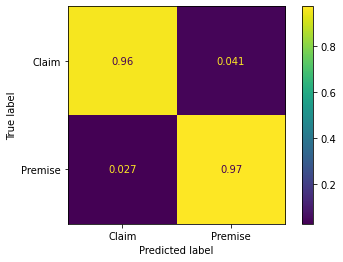

In [ ]:
# Print the confusion matrix.
cm=confusion_matrix(y_true_Debater, y_pred_Debater,normalize='true')

cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
cm_disp.plot()
plt.show()

# **Stab Gurevych Predictions**

In [ ]:
X_sg_train, X_sg_test = X_sg[sections_train_set], X_sg[sections_test_set]

Y_sg_test = Y[sections_test_set]

In [ ]:
y_pred_SG=[]
y_true_SG=[]

# Transform probabilities predicted in the most probable value (0 or 1).
y_pred_temp=model.predict(X_sg_test).tolist()
for input in y_pred_temp:
    y_pred_SG.append(round(input[0]))
y_true_SG+=Y_sg_test.tolist()

In [ ]:
# Print the classification report of the result of the models created
print(classification_report(y_true_SG, y_pred_SG, target_names=target_names))   

              precision    recall  f1-score   support

       Claim       0.42      0.96      0.58       330
     Premise       0.91      0.22      0.35       570

    accuracy                           0.49       900
   macro avg       0.66      0.59      0.47       900
weighted avg       0.73      0.49      0.43       900



# **Sentences predictions**

In [ ]:
# Gets in input the list of ture labels and predicted labels of the test set and returns
# two list.
# One of the list contain only if the prediction are write(1) or wrong(0).
# The other list contain also the indication of the tipe of mistake (true/false positive/negative).

def get_correct_predictions(y_true_list:list,y_pred_list:list):
  result_list=[]
  result_list_int=[]

  for i in range(0,len(y_true_list)):
    correct_prediction=""
    correct_prediction_int=1
    if y_pred_list[i]==0:
      if y_true_list[i]==0:
        correct_prediction="True claim"
      else:
        correct_prediction="False claim"
        correct_prediction_int=0
    else:
      if y_true_list[i]==1:
        correct_prediction="True premise"
      else:
        correct_prediction="False premise"
        correct_prediction_int=0
    result_list.append(correct_prediction)
    result_list_int.append(correct_prediction_int)    

  return result_list, result_list_int



In [ ]:
# Create a list containing the correspondent value of true positive, ture negative,
# false positive and false negative, for the predicitons of the NN on the
# test sets of the two datset. 

# The correlation to select the feature to pass to the STC will be evaluated only 
# on the report of the presence of an error in each sentences (not considering the type
# of the error), sentence_prediction_int list.

sentence_prediction_SG, sentence_prediction_SG_int=get_correct_predictions(y_true_SG, y_pred_SG)
sentence_prediction_Debater, sentence_prediction_Debater_int=get_correct_predictions(y_true_Debater, y_pred_Debater)

# Get the list of the sentences used in the test sets and their length.
test_set_sentences_list_SG=[sentence_list[argument_to_sentence_map[i]] for i in sections_test_set]
test_set_sentences_list_Debater=[Debater_sentence_list[Debater_argument_to_sentence_map[i]] for i in Debater_sections_test_set]
test_set_sentences_length_SG=[arg_section_len_list[i] for i in sections_test_set]
test_set_sentences_length_Debater=[Debater_arg_section_len_list[i] for i in Debater_sections_test_set]

argument_test_set_sentences_list_SG=[arg_sections_list[i] for i in sections_test_set]
argument_test_set_sentences_list_Debater=[Debater_arg_sections_list[i] for i in Debater_sections_test_set]

# For the section in more than one sentence concatenate the sentences together.
for i in range(0,len(test_set_sentences_list_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    test_set_sentences_list_SG[i]+=" . "+sentence_list[argument_to_sentence_map[sections_test_set[i]+j+1]]

for i in range(0,len(test_set_sentences_list_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    test_set_sentences_list_Debater[i]+=" . "+Debater_sentence_list[Debater_argument_to_sentence_map[Debater_sections_test_set[i]+j+1]]    

In [ ]:
len(test_set_sentences_list_SG)

900

In [ ]:
len(sentence_prediction_SG)

900

In [ ]:
sentence_prediction_SG.count("False premise")

13

In [ ]:
sentence_prediction_SG.count("True premise")

124

In [ ]:
sentence_prediction_SG.count("False claim")

446

In [ ]:
sentence_prediction_SG.count("True claim")

317

In [ ]:
len(sentence_prediction_Debater)

514

In [ ]:
sentence_prediction_Debater.count("False premise")

9

In [ ]:
sentence_prediction_Debater.count("True premise")

284

In [ ]:
sentence_prediction_Debater.count("False claim")

8

In [ ]:
sentence_prediction_Debater.count("True claim")

213

## **Correaltion scores**

In [ ]:
# Compute the sorted correlation scores.
# Takes in input a dataframe and a list of labels, returns the sorted (from higher to lower) 
# list of columns names and their correlation value.

def get_correlation_scores(dataframe: pd.DataFrame, labels: list)->list:
  correlation_scores= []

  columns=dataframe.columns
  for column in columns:
    correlation, p_value = spearmanr(dataframe[column].values, labels)
    # Correlation absolute value.
    correlation = np.abs(correlation)
    correlation_scores.append((correlation,column))

  # Sort the correlation scores of each word with the lable by the correlation score associated.
  correlation_scores=sorted(correlation_scores, key=lambda x: (x[0]), reverse=True)    

  return correlation_scores

## **POS preparation**

In [ ]:
# Separate each sentence in the list of POS TAG that compones them.
POS_sentence_list=[nltk.pos_tag(nltk.word_tokenize(sentence)) for sentence in test_set_sentences_list_SG]
Debater_POS_sentence_list=[nltk.pos_tag(nltk.word_tokenize(sentence)) for sentence in test_set_sentences_list_Debater]

POS_sentence_list[0]

[('from', 'IN'),
 ('this', 'DT'),
 ('point', 'NN'),
 ('of', 'IN'),
 ('view', 'NN'),
 (',', ','),
 ('i', 'NN'),
 ('firmly', 'RB'),
 ('believe', 'VBP'),
 ('that', 'IN'),
 ('we', 'PRP'),
 ('should', 'MD'),
 ('attach', 'VB'),
 ('more', 'JJR'),
 ('importance', 'NN'),
 ('to', 'TO'),
 ('cooperation', 'NN'),
 ('during', 'IN'),
 ('primary', 'JJ'),
 ('education', 'NN')]

In [ ]:
# Create a version with the simplifyed version of the POS tag.

simplified_POS_sentence_list=[]
Debater_simplified_POS_sentence_list=[]

for POS_sentence in POS_sentence_list:
  simplified_POS_sentence_list.append([(word, map_tag('en-ptb', 'universal', tag)) for word, tag in POS_sentence])
for POS_sentence in Debater_POS_sentence_list:
  Debater_simplified_POS_sentence_list.append([(word, map_tag('en-ptb', 'universal', tag)) for word, tag in POS_sentence])  

In [ ]:
simplified_POS_sentence_list[0]

[('from', 'ADP'),
 ('this', 'DET'),
 ('point', 'NOUN'),
 ('of', 'ADP'),
 ('view', 'NOUN'),
 (',', '.'),
 ('i', 'NOUN'),
 ('firmly', 'ADV'),
 ('believe', 'VERB'),
 ('that', 'ADP'),
 ('we', 'PRON'),
 ('should', 'VERB'),
 ('attach', 'VERB'),
 ('more', 'ADJ'),
 ('importance', 'NOUN'),
 ('to', 'PRT'),
 ('cooperation', 'NOUN'),
 ('during', 'ADP'),
 ('primary', 'ADJ'),
 ('education', 'NOUN')]

In [ ]:
# Get the list of the sentences as POS tag from the list of the
# list of the POS tag of each sentence. 
def get_POS_sentence_list(POS_sentence_list: list)->list:
  POS_sentences=[]
  for POS_list in POS_sentence_list:
    sentence=""
    for word, tag in POS_list:
      sentence+=tag+" "
    POS_sentences.append(sentence)    

  return POS_sentences

In [ ]:
POS_sentences=get_POS_sentence_list(POS_sentence_list)
Debater_POS_sentences=get_POS_sentence_list(Debater_POS_sentence_list)
simple_POS_sentences=get_POS_sentence_list(simplified_POS_sentence_list)
Debater_simple_POS_sentences=get_POS_sentence_list(Debater_simplified_POS_sentence_list)

POS_sentences[0]

'IN DT NN IN NN , NN RB VBP IN PRP MD VB JJR NN TO NN IN JJ NN '

## **Customised Tokenizer**

In [ ]:
#  Lemmatization is used.
def build_tokenizer(text):

  wordnet_lemmatizer = WordNetLemmatizer()

  # Text tokenization.
  tokens=nltk.word_tokenize(text)

  # Text normalization throgh lemmatizzation.

  lemmas=[]
  for word in tokens:
    lemmas.append(wordnet_lemmatizer.lemmatize(word))

  return lemmas  

## **Bag of words**

In [ ]:
# Trasformation of the passed corpus in the dataframe of the bag of ngram contained
# in it.
def bag_of_ngram(sentence_list: list, ngram: int)-> pd.DataFrame:
  vectorizer=CountVectorizer(tokenizer=build_tokenizer,ngram_range=(ngram,ngram))
  bag_ngram=vectorizer.fit_transform(sentence_list)

  dataframe=pd.DataFrame(bag_ngram.toarray(), columns=vectorizer.get_feature_names())

  return dataframe

## **POS Bigrams**

In [ ]:
# Get the BOW of the bigrams of the POS tag.

POS_bigrams=bag_of_ngram(POS_sentences,2)
simple_POS_bigrams=bag_of_ngram(simple_POS_sentences,2)
Debater_POS_bigrams=bag_of_ngram(Debater_POS_sentences,2)
Debater_simple_POS_bigrams=bag_of_ngram(Debater_simple_POS_sentences,2)

POS_bigrams.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,$ cc,$ jj,$ jjs,$ nn,$ nns,$ rb,$ vbn,"'' ,",'' dt,'' nn,'' vbz,", ``",", cc",", cd",", dt",", ex",", fw",", in",", jj",", jjr",", jjs",", md",", nn",", nnp",", nns",", pdt",", prp",", rb",", rbr",", to",", vb",", vbd",", vbg",", vbn",", vbp",", vbz",", wdt",", wp",", wrb",". ,",...,vbz wp,vbz wrb,"wdt ,",wdt dt,wdt jj,wdt md,wdt nn,wdt nns,wdt prp,wdt rb,wdt vbd,wdt vbp,wdt vbz,wdt wrb,wp dt,wp in,wp jj,wp md,wp nn,wp prp,wp rb,wp to,wp vbd,wp vbp,wp vbz,wrb cc,wrb cd,wrb dt,wrb ex,wrb jj,wrb jjr,wrb jjs,wrb md,wrb nn,wrb nns,wrb prp,wrb rb,wrb to,wrb vbg,wrb vbz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**correlation score**

In [ ]:
# Compute the correlation scores considering only the train test sentences.
train_correlation_scores_POS_bigram=get_correlation_scores(POS_bigrams,sentence_prediction_SG_int)
train_correlation_scores_simple_POS_bigram=get_correlation_scores(simple_POS_bigrams,sentence_prediction_SG_int)

Debater_train_correlation_scores_POS_bigram=get_correlation_scores(Debater_POS_bigrams,sentence_prediction_Debater_int)
Debater_train_correlation_scores_simple_POS_bigram=get_correlation_scores(Debater_simple_POS_bigrams,sentence_prediction_Debater_int)

In [ ]:
train_correlation_scores_POS_bigram=[correlation_score for correlation_score in train_correlation_scores_POS_bigram if not math.isnan(correlation_score[0])]

In [ ]:
train_correlation_scores_POS_bigram[0:10]

[(0.1561636430493825, 'jj vbp'),
 (0.135065262359085, 'in nn'),
 (0.12793714761436836, 'nn vbd'),
 (0.11368061376487862, 'vbn dt'),
 (0.11189127940624037, 'nn vbp'),
 (0.11031139257557078, 'nn ,'),
 (0.0979079390927948, ', jj'),
 (0.0965149795042551, 'cd nn'),
 (0.09234663048824729, 'prp $'),
 (0.09175130061113605, 'prp vbp')]

In [ ]:
most_correlated_bigram_POS=[bigram[1] for bigram in train_correlation_scores_POS_bigram[0:100]]

In [ ]:
Debater_train_correlation_scores_POS_bigram=[correlation_score for correlation_score in Debater_train_correlation_scores_POS_bigram if not math.isnan(correlation_score[0])]

In [ ]:
Debater_train_correlation_scores_POS_bigram[0:10]

[(0.23872343291414433, 'vbg vbz'),
 (0.2312349596551872, 'prp ``'),
 (0.1660000536849734, ": ''"),
 (0.16318814435504306, 'rbr in'),
 (0.16318814435504306, 'vbg md'),
 (0.16318814435504306, 'vbz :'),
 (0.1412012216533386, 'nn prp'),
 (0.13867866614500587, 'nns to'),
 (0.13089385773606907, 'rb to'),
 (0.1286492499505958, "'' .")]

In [ ]:
Debater_most_correlated_bigram_POS=[bigram[1] for bigram in Debater_train_correlation_scores_POS_bigram[0:100]]

In [ ]:
most_correlated_bigram_POS[0:3]

['jj vbp', 'in nn', 'nn vbd']

In [ ]:
train_correlation_scores_simple_POS_bigram=[correlation_score for correlation_score in train_correlation_scores_simple_POS_bigram if not math.isnan(correlation_score[0])]

In [ ]:
train_correlation_scores_simple_POS_bigram[0:10]

[(0.1421643286867612, 'adp noun'),
 (0.13977994802664212, 'adj verb'),
 (0.131353923418462, 'verb adp'),
 (0.11344248936365843, 'num noun'),
 (0.0996149014727626, 'noun .'),
 (0.08542242804748593, 'noun adp'),
 (0.0850097899520509, 'noun verb'),
 (0.08389711838371991, 'adv verb'),
 (0.07835019925554486, '. adj'),
 (0.07278216425596172, 'noun adv')]

In [ ]:
most_correlated_bigram_simple_POS=[bigram[1] for bigram in train_correlation_scores_simple_POS_bigram[0:100]]

In [ ]:
Debater_train_correlation_scores_simple_POS_bigram=[correlation_score for correlation_score in Debater_train_correlation_scores_simple_POS_bigram if not math.isnan(correlation_score[0])]

In [ ]:
Debater_train_correlation_scores_simple_POS_bigram[0:10]

[(0.11315268176280223, 'adv prt'),
 (0.11014293722854694, 'noun .'),
 (0.10742790833980573, 'prt pron'),
 (0.10617988412882134, 'prt det'),
 (0.09762189167015234, 'noun pron'),
 (0.0851139939827347, '. verb'),
 (0.08445566463270127, 'noun adj'),
 (0.08374529637525, 'conj adp'),
 (0.08042477231838147, 'conj det'),
 (0.0796678655845679, 'det verb')]

In [ ]:
Debater_most_correlated_bigram_simple_POS=[bigram[1] for bigram in Debater_train_correlation_scores_simple_POS_bigram[0:100]]

## **Bag of words and Bigrams correlation**

In [ ]:
bag_words_dataframe=bag_of_ngram(test_set_sentences_list_SG, 1)
bag_bigrams_dataframe=bag_of_ngram(test_set_sentences_list_SG, 2)

Debater_bag_words_dataframe=bag_of_ngram(test_set_sentences_list_Debater, 1)
Debater_bag_bigrams_dataframe=bag_of_ngram(test_set_sentences_list_Debater, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
bag_words_dataframe.head()

,!,%,','','innovate,'m,'s,'teachers,'this,'ve,'your,",",-,.,1,10,15,1969,1st,2,2030,370,40,4:00,99,:,;,``,a,ability,able,about,above,above-mentioned,abroad,absence,absolutely,absorb,absorbed,abstract,...,wing,wise,wish,with,within,without,witnessed,woman,wonderful,word,wore,work,worked,worker,working,workplace,world,worldwide,worrying,worse,worsens,worth,worthwhile,would,writer,writing,written,wrong,year,yet,yield,you,young,youngster,your,zappa,zoo,–,’,“
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Debater_bag_words_dataframe.head()

,$,%,&,','','cradle,'is,'juvenile,'only,'public,'re,'reconsidering,'s,'something,(,),",",.,..,0.28,0.47,1,1.54,1/8,10,10.1,100,"100,000",104,10–15,11,11.2,11.8,"115,000",12,"12,000",120.,122,1225–1274,127,...,working,workshop,world,worldwide,worry,worsened,worth,worthwhile,would,wound,wounding,wrapped,wrecked,writes,writing,writings..,written,wrong,wrote,wta,wwe,x,yates,year,yet,yielded,you,young,younger,youth,zentrales,zone,|,£1.9,"£13,456.07",£660.74,‘,’,“,”
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
bag_bigrams_dataframe.head()

,"% ,",' accomplishment,' attention,' basic,' confidence,' economic,' effectiveness,' health,' kind,' knowledge,' learning,' life,' mental,' mistake,' personality,' profit,' progress,' school,' spelling,' the,"'' ,",'' is,'innovate ','m in,'m totally,'s a,'s achievement,'s an,'s birthday,'s characteristic,'s choice,'s daily,'s dependence,'s eating,'s electricity,'s environmental,'s fun,'s future,'s good,'s gravity,...,you perfect,you right,you see,you the,you think,you visit,you want,young age,young generation,young one,young owner,young people,your classmate,your clothes,your doubt,your future,your group,your job,your major,your performance,your skill,your student,zappa once,"zoo ,",zoo afford,zoo are,zoo for,zoo have,zoo is,zoo kept,zoo not,zoo offer,zoo provide,zoo they,zoo will,zoo would,zoo you,– the,’ s,’ t
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Debater_bag_bigrams_dataframe.head()

,$ 2,$ 21,$ 400,$ 7,$ 830,"% ,",% ;,% and,% divorced,% estimated,% for,% in,% increase,% market,% of,% reported,% said,% to,% wa,% will,& nbsp,& processing,& sullivan,& world,' '',"' ,",' .,' ability,' consent,' country,' culture,' development,' food,' grad,' imprisonment,' increased,' leader,' section,' wind,'' (,...,year 2040,year after,year and,year in,year is,year of,year on,year round,year to,year will,yet discussing,yet during,yet until,yielded £660.74,you .,you believe,you do,you think,young a,young voter,young woman,younger ;,youth experience,zentrales dopingkontrolllabor,zone and,zone targeted,zone than,| hamas,| the,£1.9 billion,"£13,456.07 million",£660.74 million,‘ socialist,’ market,’ s,’ t,’ than,“ civil,“ teenage,” lee
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Select the 50 words/bigram most correlated to the output (correlation computed considering 
# only the train test).

train_correlation_scores_words=get_correlation_scores(bag_words_dataframe,sentence_prediction_SG_int)
train_correlation_scores_bigram=get_correlation_scores(bag_bigrams_dataframe,sentence_prediction_SG_int)

Debater_train_correlation_scores_words=get_correlation_scores(Debater_bag_words_dataframe,sentence_prediction_Debater_int)
Debater_train_correlation_scores_bigram=get_correlation_scores(Debater_bag_bigrams_dataframe,sentence_prediction_Debater_int)

In [ ]:
train_correlation_scores_words=[correlation_score for correlation_score in train_correlation_scores_words if not math.isnan(correlation_score[0])]

In [ ]:
train_correlation_scores_words[0:10]

[(0.2124021895871228, 'i'),
 (0.16831383498040986, 'conclusion'),
 (0.15284107294940955, 'that'),
 (0.14842312723199225, 'should'),
 (0.1412481293751171, 'they'),
 (0.12486469826059514, ','),
 (0.12230554738629118, 'my'),
 (0.10887612390378101, 'reason'),
 (0.10887352669839302, 'in'),
 (0.10813999665054291, 'wa')]

In [ ]:
most_correlated_word=[word[1] for word in train_correlation_scores_words[0:100]]

In [ ]:
Debater_train_correlation_scores_words=[correlation_score for correlation_score in Debater_train_correlation_scores_words if not math.isnan(correlation_score[0])]

In [ ]:
Debater_train_correlation_scores_words[0:10]

[(0.337935448935235, 'board'),
 (0.337935448935235, 'boarding'),
 (0.337935448935235, 'determined'),
 (0.337935448935235, 'prior'),
 (0.337935448935235, 'vessel'),
 (0.31420493605387484, 'unreasonable'),
 (0.31420493605387484, 'zone'),
 (0.2714693676063328, 'great'),
 (0.2714693676063328, 'limited'),
 (0.2714693676063328, 'substantial')]

In [ ]:
Debater_most_correlated_word=[word[1] for word in Debater_train_correlation_scores_words[0:100]]

In [ ]:
train_correlation_scores_bigram=[correlation_score for correlation_score in train_correlation_scores_bigram if not math.isnan(correlation_score[0])]

In [ ]:
train_correlation_scores_bigram[0:10]

[(0.19433460414130677, ', i'),
 (0.1609827492493215, 'conclusion ,'),
 (0.14539561384456778, 'in conclusion'),
 (0.10253436608075334, ', although'),
 (0.10253436608075334, 'mobile phone'),
 (0.09879507771674799, 'should be'),
 (0.09282725717518577, 'because of'),
 (0.0876304470317992, ', they'),
 (0.08729156151053502, 'to make'),
 (0.08702404548918086, ', because')]

In [ ]:
most_correlated_bigram=[bigram[1] for bigram in train_correlation_scores_bigram[0:100]]

In [ ]:
Debater_train_correlation_scores_bigram=[correlation_score for correlation_score in Debater_train_correlation_scores_bigram if not math.isnan(correlation_score[0])]

In [ ]:
Debater_train_correlation_scores_bigram[0:10]

[(0.3550420109705687, 'the commission'),
 (0.337935448935235, '`` decision'),
 (0.337935448935235, 'a great'),
 (0.337935448935235, 'and unreasonable'),
 (0.337935448935235, 'at a'),
 (0.337935448935235, 'blockade zone'),
 (0.337935448935235, 'board the'),
 (0.337935448935235, 'boarding wa'),
 (0.337935448935235, 'but stated'),
 (0.337935448935235, 'commission determined')]

In [ ]:
Debater_most_correlated_bigram=[bigram[1] for bigram in Debater_train_correlation_scores_bigram[0:100]]

## **Only argumentative sections: Bag of words correlation**

In [ ]:
a_bag_words_dataframe=bag_of_ngram(argument_test_set_sentences_list_SG, 1)

a_Debater_bag_words_dataframe=bag_of_ngram(argument_test_set_sentences_list_Debater, 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
a_bag_words_dataframe.head()

,%,','','innovate,'m,'s,'teachers,'this,'ve,'your,",",-,.,1,10,15,1969,1st,2,2030,370,40,4:00,99,:,;,``,a,ability,able,about,above,abroad,absence,absolutely,absorb,absorbed,abstract,academic,accelarates,...,win,window,wing,wise,wish,with,within,without,witnessed,woman,wonderful,word,wore,work,worked,worker,working,workplace,world,worldwide,worrying,worsens,worth,worthwhile,would,writer,writing,written,wrong,year,yield,you,young,youngster,your,zappa,zoo,–,’,“
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
a_Debater_bag_words_dataframe.head()

,$,%,&,','','is,'m,'re,'reconsidering,'s,'something,'the,(,),",",.,..,..and,.16,.3,0.040,0.078,0.161,0.2,0.28,0.47,0.83,1,"1,000",1.54,1/8,10,"10,000",10.1,10.7,100,"100,000",1000,102,104,...,worldwide,worn,worry,worsened,worst,worth,worthlessness,worthwhile,would,wound,wounded,wounding,wrapped,wrecked,writes,writing,writings..,wrong,wrote,x,yates,year,yearold,yet,yielded,you,young,younger,youth,yunnan,zone,£1.9,"£13,456.07",£660.74,–,—,‘,’,“,”
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Select the 50 words/bigram most correlated to the output (correlation computed considering 
# only the train test).

a_train_correlation_scores_words=get_correlation_scores(a_bag_words_dataframe,sentence_prediction_SG_int)

a_Debater_train_correlation_scores_words=get_correlation_scores(a_Debater_bag_words_dataframe,sentence_prediction_Debater_int)

In [ ]:
a_train_correlation_scores_words=[correlation_score for correlation_score in a_train_correlation_scores_words if not math.isnan(correlation_score[0])]

In [ ]:
a_train_correlation_scores_words[0:10]

[(0.15391086206027774, 'should'),
 (0.10813999665054291, 'wa'),
 (0.10721697752241462, 'they'),
 (0.0992807485285662, 'his'),
 (0.09813298706432412, 'news'),
 (0.09661612481498925, 'mobile'),
 (0.09661612481498925, 'taught'),
 (0.09489606342001981, 'i'),
 (0.09348721613245158, 'study'),
 (0.09262878950455901, 'phone')]

In [ ]:
a_most_correlated_word=[word[1] for word in a_train_correlation_scores_words[0:100]]

In [ ]:
a_Debater_train_correlation_scores_words=[correlation_score for correlation_score in a_Debater_train_correlation_scores_words if not math.isnan(correlation_score[0])]

In [ ]:
a_Debater_train_correlation_scores_words[0:10]

[(0.23872343291414433, '21st'),
 (0.23872343291414433, 'aged'),
 (0.23872343291414433, 'becoming'),
 (0.23872343291414433, 'character'),
 (0.23872343291414433, 'chlamydia'),
 (0.23872343291414433, 'combat'),
 (0.23872343291414433, 'continuity'),
 (0.23872343291414433, 'counseling'),
 (0.23872343291414433, 'crowded'),
 (0.23872343291414433, 'dating')]

In [ ]:
a_Debater_most_correlated_word=[word[1] for word in a_Debater_train_correlation_scores_words[0:100]]

# **STC SG**

In [ ]:
# Read the datasets retrieved by the Stab and Gurevych dataset.

statistic=pd.read_csv('sentence_statistic.csv')
statistic=statistic.iloc[sections_test_set]
statistic.reset_index(drop=True, inplace=True)

POS=pd.read_csv('sentence_POS.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    print("POS")
    print(POS.iloc[i])
    POS.iloc[i]+=POS.iloc[i+j+1]
    print(POS.iloc[i+j+1])
    print(POS.iloc[i])
POS=POS.iloc[sections_test_set]
POS.reset_index(drop=True, inplace=True)

simple_POS=pd.read_csv('sentence_simple_POS.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    simple_POS.iloc[i]+=simple_POS.iloc[i+j+1]
simple_POS=simple_POS.iloc[sections_test_set]
simple_POS.reset_index(drop=True, inplace=True)

bigram_POS=POS_bigrams[most_correlated_bigram_POS]
bigram_POS.reset_index(drop=True, inplace=True)

bigram_simple_POS=simple_POS_bigrams[most_correlated_bigram_simple_POS]
bigram_simple_POS.reset_index(drop=True, inplace=True)

dependency=pd.read_csv('sentence_dependency.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    dependency.iloc[i]+=dependency.iloc[i+j+1]
dependency=dependency.iloc[sections_test_set]
dependency.reset_index(drop=True, inplace=True)

dependency_tree_stat=pd.read_csv('sentence_dependency_tree_stat.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    print("dependency")
    print(dependency_tree_stat.iloc[i])
    print(dependency_tree_stat.iloc[i+j+1])
    dependency_tree_stat.iloc[i]['tree depth']=max(dependency_tree_stat.iloc[i]['tree depth'],dependency_tree_stat.iloc[i+j+1]['tree depth'])
    dependency_tree_stat.iloc[i]['max number of children of a ROOT node']=max(dependency_tree_stat.iloc[i]['max number of children of a ROOT node'],dependency_tree_stat.iloc[i+j+1]['max number of children of a ROOT node'])
    print(print(dependency_tree_stat.iloc[i]))
dependency_tree_stat=dependency_tree_stat.iloc[sections_test_set]
dependency_tree_stat.reset_index(drop=True, inplace=True)

named_entity=pd.read_csv('sentence_named_entity_BOW.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    named_entity.iloc[i]+=named_entity.iloc[i+j+1]
named_entity=named_entity.iloc[sections_test_set]
named_entity.reset_index(drop=True, inplace=True)

BOW=bag_words_dataframe[most_correlated_word]
BOW.reset_index(drop=True, inplace=True)

Bigram=bag_bigrams_dataframe[most_correlated_bigram]
Bigram.reset_index(drop=True, inplace=True)

imported_ngram=pd.read_csv('essay_BOW_appendix_words.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    imported_ngram.iloc[i]+=imported_ngram.iloc[i+j+1]
imported_ngram=imported_ngram.iloc[sections_test_set]
imported_ngram.reset_index(drop=True, inplace=True)

others=pd.read_csv('remaining_stat.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    others.iloc[i]+=others.iloc[i+j+1]
  others.iloc[i]=others.iloc[i]/(test_set_sentences_length_SG[i]+1)
others=others.iloc[sections_test_set]
others.reset_index(drop=True, inplace=True)

a_BOW=a_bag_words_dataframe[a_most_correlated_word]
a_BOW.reset_index(drop=True, inplace=True)

POS
$      0
''     1
(      0
)      0
,      2
.      0
:      1
``     1
cc     0
cd     0
dt     2
ex     0
fw     0
in     4
jj     3
jjr    0
jjs    0
md     0
nn     9
nnp    0
nns    0
pdt    0
po     0
prp    0
rb     1
rbr    0
rp     0
sym    0
to     0
uh     0
vb     0
vbd    0
vbg    0
vbn    0
vbp    0
vbz    3
wdt    1
wp     0
wrb    0
Name: 162, dtype: int64
$      0
''     0
(      0
)      0
,      0
.      0
:      0
``     0
cc     1
cd     0
dt     2
ex     1
fw     0
in     2
jj     2
jjr    0
jjs    0
md     0
nn     3
nnp    0
nns    2
pdt    0
po     1
prp    0
rb     0
rbr    0
rp     0
sym    0
to     0
uh     0
vb     0
vbd    0
vbg    1
vbn    0
vbp    0
vbz    1
wdt    0
wp     0
wrb    0
Name: 163, dtype: int64
$       0
''      1
(       0
)       0
,       2
.       0
:       1
``      1
cc      1
cd      0
dt      4
ex      1
fw      0
in      6
jj      5
jjr     0
jjs     0
md      0
nn     12
nnp     0
nns     2
pdt     0
po      1
prp     0
rb    

In [ ]:
statistic.shape

(900, 7)

In [ ]:
bigram_POS.shape

(900, 100)

In [ ]:
# Remove data types that are not categorical.
statistic=statistic.drop(columns=['number words in sentence','sentence length / media sentence length in essay'])
others=others.drop(columns=['type token ratio'])
statistic=statistic.round(0)
others=others.round(0)

In [ ]:
# Combine the dataframe of the type of data used in the NN and of the data not 
# used.
dataframe_non_used=dependency
dataframe_non_used=pd.concat([dataframe_non_used,POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,simple_POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,dependency_tree_stat], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,named_entity], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,imported_ngram], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,others], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,bigram_POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,bigram_simple_POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,Bigram], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,statistic], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,BOW], axis=1)
print(dataframe_non_used.shape)

(900, 83)
(900, 95)
(900, 97)
(900, 114)
(900, 154)
(900, 155)
(900, 255)
(900, 355)
(900, 455)
(900, 460)
(900, 560)


In [ ]:
sentence_predictions_SG = pd.DataFrame(data={'argumentative': sentence_prediction_SG})

## **Learning**

In [ ]:
# Divide the items in a train and a test set.
list_index=[i for i in range(others.shape[0])]

train_index,test_index=train_test_split(list_index,test_size=0.2, random_state=32)

In [ ]:
pos_premise=-1
pos_claim=-1
count=0
instance_premise=""
istance_claim=""
section_instance_premise=""
section_istance_claim=""

for i in test_index:
  if sentence_prediction_SG[i]=='False premise':
    instance_premise=test_set_sentences_list_SG[i]
    section_instance_premise=argument_test_set_sentences_list_SG[i]
    pos_premise=count
  if sentence_prediction_SG[i]=='False claim':
    instance_claim=test_set_sentences_list_SG[i]
    section_instance_claim=argument_test_set_sentences_list_SG[i]
    pos_claim=count
  if not (pos_claim==-1 or pos_premise==-1):
    break
  count+=1  

print(instance_claim)
print(instance_premise)
print(section_instance_claim)
print(section_instance_premise)
print(pos_claim)
print(pos_premise)

it is very difficult to get this sort of information from past in newspapers and magazines as one has to know before where to look at 
many circumstances that i experienced change the way i think 
it is very difficult to get this sort of information from past in newspapers and magazines as one has to know before where to look at 
many circumstances that i experienced change the way i think 
42
47


In [ ]:
# The method takes in input a dataframe containing the data from which to predict
# the output and the output labels desired and returns, the label for the 
# test set, the probabilities of the predicted classes, and the global and local 
# explanations of which features are most usefoul in predicting the labels.

def stc_procedure(dataframe:pd.DataFrame,label:pd.DataFrame):
  dataframe['argumentative']=label['argumentative'].tolist()

  STC = SparseTensorClassifier(targets=['argumentative'], features=dataframe.columns[:-1])

  STC.fit(dataframe.iloc[train_index])

  STC.set({"entropy": 1, "balance": 1, "power": 1})

  global_explainability = STC.explain()

  labels, probability, explainability = STC.predict(dataframe.iloc[test_index])

  ground_labels=dataframe['argumentative'].iloc[test_index]

  return ground_labels, global_explainability, labels, probability, explainability

## **Not used stat dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dataframe_non_used,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5611111111111111
f1 score: 0.44589154102909234
precision: 0.4376925516491482
recall: 0.4842747683535282


In [ ]:
global_explainability_tabular.loc["True claim"][:25]

,features,score
argumentative,,
True claim,nn in: 0,0.000163
True claim,noun adp: 1,0.000148
True claim,noun adp: 0,0.000122
True claim,"nn ,: 0",0.000122
True claim,pron verb: 1,0.000115
True claim,should: 1,0.000112
True claim,total sentences in paragraph: 4,0.000108
True claim,noun .: 0,0.000102
True claim,advcl: 1,0.000098


In [ ]:
global_explainability_tabular.loc["True premise"][:25]

,features,score
argumentative,,
True premise,nn vbd: 1,0.000149
True premise,vbd rb: 1,0.000139
True premise,nn in: 0,0.000126
True premise,cc vbd: 1,0.000126
True premise,noun adp: 1,0.000126
True premise,conj: 2,0.000117
True premise,"nn ,: 3",0.000116
True premise,total sentences in paragraph: 4,0.000115
True premise,cc: 2,0.000113


In [ ]:
global_explainability_tabular.loc["False claim"][:25]

,features,score
argumentative,,
False claim,nn in: 0,0.000185
False claim,noun adp: 1,0.000150
False claim,noun adp: 0,0.000138
False claim,"nn ,: 0",0.000127
False claim,total sentences in paragraph: 4,0.000127
False claim,pron verb: 1,0.000113
False claim,in nn: 0,0.000109
False claim,sentence in paragraph: 0,0.000109
False claim,advcl: 1,0.000107


In [ ]:
global_explainability_tabular.loc["False premise"][:25]

,features,score
argumentative,,
False premise,in nn: 2,0.000274
False premise,"conclusion ,: 1",0.000225
False premise,conclusion: 1,0.000221
False premise,", i: 1",0.000193
False premise,verb det: 2,0.000187
False premise,max number of children of a ROOT node: 10,0.000182
False premise,. noun: 3,0.000182
False premise,to them: 1,0.000182
False premise,po: 4,0.000171


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:15]

features         score
item argumentative                                     
47   False premise                   i: 2  2.891333e-07
     False premise                verb: 2  1.717150e-07
     False premise  sentence in essay: 10  1.360264e-07
     False premise                that: 1  1.257418e-07
     False premise           verb verb: 1  1.230407e-07
     False premise                conj: 1  1.037880e-07
     False premise           noun noun: 1  1.036105e-07
     False premise  paragraph in essay: 2  9.048193e-08
     False premise                 det: 1  8.838354e-08
     False premise           noun verb: 2  7.506449e-08
     False premise                 vbp: 1  7.144682e-08
     False premise                  cc: 1  6.973555e-08
     False premise                prep: 2  4.850080e-08
     False premise                nn ,: 0  3.840177e-08
     False premise              noun .: 0  3.821421e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:15]

features         score
item argumentative                                               
42   False claim                             det: 2  3.230777e-07
     False claim                            nn ,: 0  2.274816e-07
     False claim    total sentences in paragraph: 4  2.260168e-07
     False claim                       pron verb: 1  2.026761e-07
     False claim                          noun .: 0  1.875087e-07
     False claim                            verb: 4  1.199724e-07
     False claim                            that: 0  8.504131e-08
     False claim                               i: 0  7.341677e-08
     False claim                        verb det: 1  7.321208e-08
     False claim                              nn: 2  7.075002e-08
     False claim                            pobj: 4  6.612020e-08
     False claim                             jjr: 1  6.553000e-08
     False claim                        det noun: 1  6.186508e-08
     False claim                             vbz: 2  5.683600e-08
     False claim                            amod: 4  5.549648e-08

## **Statistic dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(statistic,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.28888888888888886
f1 score: 0.2086105302704493
precision: 0.26334184756603024
recall: 0.3017640769779044


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,total sentences in paragraph: 4,0.012088
True claim,sentence in paragraph: 0,0.010458
True claim,sentence in essay: 11,0.003762
True claim,sentence in essay: 10,0.003749
True claim,paragraph in essay: 2,0.003352
True claim,sentence in essay: 2,0.003181
True claim,total sentences in paragraph: 7,0.002723
True claim,sentence in essay: 7,0.002653
True claim,sentence in essay: 3,0.002621


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,total sentences in paragraph: 4,0.012835
True premise,sentence in paragraph: 0,0.012011
True premise,sentence in essay: 3,0.007196
True premise,total paragraphs in document: 6,0.004585
True premise,sentence in essay: 7,0.004035
True premise,total sentences in paragraph: 9,0.003988
True premise,sentence in essay: 2,0.003583
True premise,total paragraphs in document: 7,0.002921
True premise,sentence in essay: 6,0.002886


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,total sentences in paragraph: 4,0.014176
False claim,sentence in paragraph: 0,0.012171
False claim,sentence in essay: 4,0.004156
False claim,sentence in paragraph: 4,0.003643
False claim,sentence in essay: 5,0.003364
False claim,sentence in essay: 3,0.003316
False claim,sentence in essay: 0,0.003246
False claim,paragraph in essay: 1,0.002744
False claim,paragraph in essay: 2,0.002712


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,total sentences in paragraph: 7,0.009113
False premise,sentence in essay: 10,0.008532
False premise,sentence in essay: 9,0.007138
False premise,sentence in essay: 18,0.006051
False premise,paragraph in essay: 2,0.005675
False premise,sentence in paragraph: 1,0.003335
False premise,sentence in essay: 14,0.002733
False premise,sentence in essay: 1,0.002369
False premise,sentence in paragraph: 5,0.002289


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                                           
47   False premise            sentence in essay: 10  0.001706
     False premise            paragraph in essay: 2  0.001135
     False premise  total sentences in paragraph: 6  0.000433
     False premise  total paragraphs in document: 5  0.000222
     False premise         sentence in paragraph: 2  0.000030

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                                           
42   False claim    total sentences in paragraph: 4  0.002835
     False claim               sentence in essay: 3  0.000663
     False claim    total paragraphs in document: 5  0.000165
     False claim              paragraph in essay: 0  0.000144
     False claim           sentence in paragraph: 3  0.000084

## **POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(POS,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.24444444444444444
f1 score: 0.20959372375998053
precision: 0.25035514916264834
recall: 0.2652797576621525


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,in: 1,0.001246
True claim,nn: 0,0.000630
True claim,cc: 2,0.000587
True claim,rbr: 1,0.000565
True claim,jjr: 1,0.000562
True claim,nn: 2,0.000541
True claim,nns: 4,0.000539
True claim,vbz: 2,0.000527
True claim,wrb: 1,0.000485


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,nn: 6,0.001278
True premise,cc: 2,0.000833
True premise,in: 1,0.000747
True premise,nns: 4,0.000710
True premise,rbr: 1,0.000584
True premise,jjr: 1,0.000528
True premise,nns: 7,0.000508
True premise,md: 1,0.000461
True premise,vb: 3,0.000447


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,in: 1,0.001262
False claim,nn: 2,0.000569
False claim,ex: 1,0.000544
False claim,jjr: 1,0.000527
False claim,wrb: 1,0.000526
False claim,nns: 4,0.000514
False claim,nn: 0,0.000510
False claim,rbr: 1,0.000500
False claim,vbz: 2,0.000457


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,vb: 5,0.001562
False premise,po: 2,0.001307
False premise,nn: 2,0.001162
False premise,:: 1,0.001065
False premise,vbp: 1,0.000575
False premise,vbd: 1,0.000554
False premise,in: 2,0.000449
False premise,rb: 4,0.000415
False premise,nns: 1,0.000362


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
47   False premise   vbp: 1  0.000015
     False premise    in: 3  0.000005
     False premise    cc: 1  0.000004
     False premise    dt: 1  0.000004
     False premise   prp: 1  0.000002

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                   
42   False claim      nn: 2  0.000015
     False claim     jjr: 1  0.000014
     False claim     vbz: 2  0.000012
     False claim      in: 5  0.000009
     False claim     vbp: 1  0.000008

## **Simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(simple_POS,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.3055555555555556
f1 score: 0.23139214149609685
precision: 0.2640952797202797
recall: 0.2705808980755524


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,det: 2,0.004253
True claim,adp: 1,0.004050
True claim,verb: 1,0.003705
True claim,verb: 4,0.002684
True claim,conj: 2,0.001907
True claim,adv: 3,0.001778
True claim,noun: 0,0.001628
True claim,noun: 7,0.001517
True claim,noun: 8,0.001435


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,det: 2,0.004065
True premise,conj: 2,0.002707
True premise,verb: 4,0.002442
True premise,adp: 1,0.002427
True premise,noun: 7,0.001923
True premise,verb: 2,0.001759
True premise,noun: 8,0.001386
True premise,num: 1,0.001298
True premise,noun: 10,0.001225


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,det: 2,0.005496
False claim,adp: 1,0.004101
False claim,verb: 4,0.003135
False claim,verb: 1,0.002760
False claim,adv: 3,0.002013
False claim,noun: 7,0.001546
False claim,verb: 2,0.001506
False claim,conj: 2,0.001379
False claim,noun: 8,0.001186


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,verb: 2,0.004487
False premise,verb: 10,0.004248
False premise,prt: 4,0.003141
False premise,adp: 2,0.001460
False premise,noun: 1,0.001079
False premise,noun: 4,0.000970
False premise,noun: 9,0.000909
False premise,det: 1,0.000866
False premise,adv: 4,0.000692


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
47   False premise  verb: 2  0.000374
     False premise   det: 1  0.000072
     False premise   adp: 3  0.000053
     False premise  conj: 1  0.000040
     False premise   prt: 1  0.000022

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                   
42   False claim     det: 2  0.000458
     False claim    verb: 4  0.000261
     False claim     adp: 5  0.000098
     False claim     prt: 1  0.000033
     False claim     adv: 0  0.000009

## **bigram POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(bigram_POS,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.4666666666666667
f1 score: 0.3354226020892687
precision: 0.38667097465641154
recall: 0.42008196721311475


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,nn in: 0,0.000913
True claim,"nn ,: 0",0.000682
True claim,in nn: 0,0.000493
True claim,vbp in: 1,0.000347
True claim,vbn in: 1,0.000288
True claim,in nn: 2,0.000270
True claim,nns vbp: 2,0.000227
True claim,vb vbn: 1,0.000211
True claim,rb vbp: 1,0.000190


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,nn vbd: 1,0.000833
True premise,vbd rb: 1,0.000780
True premise,nn in: 0,0.000707
True premise,cc vbd: 1,0.000706
True premise,"nn ,: 3",0.000652
True premise,nns vbd: 1,0.000571
True premise,vbd vbn: 1,0.000555
True premise,vbn in: 1,0.000554
True premise,prp $: 2,0.000475


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,nn in: 0,0.001039
False claim,"nn ,: 0",0.000713
False claim,in nn: 0,0.000609
False claim,vbp rb: 1,0.000264
False claim,vbn in: 1,0.000251
False claim,vbp in: 1,0.000212
False claim,in nn: 2,0.000172
False claim,nns rb: 1,0.000130
False claim,"nn ,: 1",0.000129


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,in nn: 2,0.001533
False premise,vbp rb: 1,0.000944
False premise,nn vbp: 2,0.000884
False premise,cc md: 1,0.000729
False premise,cc nns: 2,0.000696
False premise,wrb nn: 1,0.000649
False premise,nn in: 4,0.000547
False premise,", nn: 2",0.000544
False premise,vbp in: 2,0.000521


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                         
47   False premise    nn ,: 0  1.204279e-06
     False premise    , nn: 0  7.192292e-07
     False premise  nn vbp: 1  6.476432e-07
     False premise  vbp rb: 0  4.621561e-07
     False premise  cc nns: 0  3.811012e-07

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                         
42   False claim      nn ,: 0  7.133824e-06
     False claim     in nn: 2  1.715208e-06
     False claim      , nn: 0  1.199528e-06
     False claim    vbz to: 1  7.140170e-07
     False claim    vbp rb: 0  6.266523e-07

## **Bigram simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(bigram_simple_POS,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.4166666666666667
f1 score: 0.31093509396817315
precision: 0.33548136645962734
recall: 0.3835976478973627


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,noun adp: 1,0.000827
True claim,noun adp: 0,0.000684
True claim,pron verb: 1,0.000643
True claim,noun .: 0,0.000573
True claim,verb verb: 2,0.000460
True claim,noun verb: 1,0.000446
True claim,adp noun: 0,0.000285
True claim,adv adp: 1,0.000262
True claim,verb det: 1,0.000245


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,noun adp: 1,0.000706
True premise,pron verb: 1,0.000578
True premise,noun .: 3,0.000576
True premise,noun adp: 0,0.000499
True premise,num noun: 1,0.000482
True premise,. adv: 1,0.000415
True premise,adv adp: 1,0.000386
True premise,noun verb: 1,0.000312
True premise,noun .: 4,0.000302


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,noun adp: 1,0.000841
False claim,noun adp: 0,0.000773
False claim,pron verb: 1,0.000636
False claim,noun .: 0,0.000588
False claim,noun verb: 1,0.000443
False claim,adp noun: 0,0.000384
False claim,verb verb: 2,0.000333
False claim,adv adp: 1,0.000318
False claim,verb det: 1,0.000230


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,verb det: 2,0.001046
False premise,. noun: 3,0.001018
False premise,verb prt: 2,0.000853
False premise,adv prt: 1,0.000823
False premise,noun adp: 4,0.000823
False premise,prt noun: 1,0.000784
False premise,adj num: 1,0.000748
False premise,noun adp: 2,0.000666
False premise,det adj: 2,0.000659


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                            
47   False premise  verb verb: 1  3.858557e-06
     False premise  noun noun: 1  3.249227e-06
     False premise  noun verb: 2  2.354022e-06
     False premise     noun .: 0  1.198398e-06
     False premise     . noun: 0  8.070859e-07

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                        
42   False claim    pron verb: 1  0.000006
     False claim       noun .: 0  0.000006
     False claim     verb det: 1  0.000002
     False claim     det noun: 1  0.000002
     False claim      adp det: 0  0.000002

## **Dependency BOW dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dependency,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.26666666666666666
f1 score: 0.20454899106184443
precision: 0.24330161455289306
recall: 0.21084283677833215


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,advcl: 1,0.001246
True claim,advmod: 2,0.001110
True claim,compound: 1,0.001089
True claim,conj: 2,0.000635
True claim,nsubj: 0,0.000612
True claim,prep: 4,0.000566
True claim,cc: 2,0.000518
True claim,dobj: 1,0.000509
True claim,dobj: 3,0.000467


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,advcl: 1,0.001132
True premise,compound: 1,0.001123
True premise,prep: 4,0.001090
True premise,advmod: 2,0.001078
True premise,conj: 2,0.000755
True premise,cc: 2,0.000707
True premise,pobj: 4,0.000701
True premise,amod: 4,0.000495
True premise,dobj: 3,0.000493


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,advcl: 1,0.001359
False claim,compound: 1,0.001041
False claim,advmod: 2,0.000990
False claim,nsubj: 0,0.000737
False claim,dobj: 1,0.000552
False claim,prep: 4,0.000491
False claim,pobj: 4,0.000471
False claim,expl: 1,0.000461
False claim,conj: 2,0.000445


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,po: 4,0.002172
False premise,parataxis: 1,0.001823
False premise,nsubj: 5,0.001668
False premise,aux: 5,0.001514
False premise,neg: 1,0.001296
False premise,case: 2,0.001158
False premise,dobj: 0,0.000718
False premise,relcl: 2,0.000674
False premise,xcomp: 1,0.000657


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                       
47   False premise      prep: 2  0.000008
     False premise      conj: 1  0.000006
     False premise  compound: 0  0.000006
     False premise      amod: 3  0.000004
     False premise      dobj: 1  0.000004

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                    
42   False claim     pobj: 4  0.000011
     False claim     amod: 4  0.000009
     False claim     dobj: 0  0.000008
     False claim    xcomp: 1  0.000006
     False claim      det: 2  0.000005

## **Dependency tree stat**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dependency_tree_stat,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.20555555555555555
f1 score: 0.17737423252129136
precision: 0.24054054054054055
recall: 0.23823948681397006


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,max number of children of a ROOT node: 3,0.014668
True claim,tree depth: 7,0.010997
True claim,tree depth: 8,0.009176
True claim,tree depth: 9,0.005841
True claim,max number of children of a ROOT node: 4,0.004622
True claim,max number of children of a ROOT node: 2,0.004554
True claim,max number of children of a ROOT node: 1,0.004158
True claim,tree depth: 5,0.003887
True claim,max number of children of a ROOT node: 9,0.003259


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,tree depth: 7,0.017839
True premise,max number of children of a ROOT node: 3,0.010622
True premise,tree depth: 9,0.009111
True premise,max number of children of a ROOT node: 2,0.007528
True premise,tree depth: 10,0.006636
True premise,max number of children of a ROOT node: 8,0.005665
True premise,tree depth: 8,0.005537
True premise,max number of children of a ROOT node: 4,0.004016
True premise,tree depth: 11,0.003697


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,tree depth: 7,0.011770
False claim,max number of children of a ROOT node: 3,0.011517
False claim,tree depth: 8,0.006635
False claim,max number of children of a ROOT node: 2,0.005728
False claim,tree depth: 4,0.005552
False claim,tree depth: 9,0.005199
False claim,max number of children of a ROOT node: 8,0.005172
False claim,max number of children of a ROOT node: 4,0.004059
False claim,max number of children of a ROOT node: 9,0.003536


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,max number of children of a ROOT node: 10,0.050901
False premise,tree depth: 11,0.020744
False premise,max number of children of a ROOT node: 2,0.016897
False premise,max number of children of a ROOT node: 7,0.007281
False premise,tree depth: 4,0.007279
False premise,tree depth: 3,0.005377
False premise,max number of children of a ROOT node: 4,0.001878
False premise,tree depth: 5,0.001675
False premise,max number of children of a ROOT node: 5,0.001064


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

,,features,score
item,argumentative,,
47,False premise,tree depth: 6,0.00047


In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                                                    
42   False claim    max number of children of a ROOT node: 4  0.002029
     False claim                               tree depth: 6  0.000323

## **Named entity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(named_entity,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.49444444444444446
f1 score: 0.22921954898282013
precision: 0.28875811688311687
recall: 0.2704472558802566


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,date: 1,0.000624
True claim,ordinal: 1,0.000624
True claim,cardinal: 1,0.000595
True claim,time: 1,0.000297
True claim,cardinal: 2,0.000268
True claim,fac: 1,0.000230
True claim,person: 2,0.000230
True claim,org: 2,0.000230
True claim,quantity: 1,0.000230


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,ordinal: 1,0.000731
True premise,date: 1,0.000731
True premise,gpe: 1,0.000619
True premise,person: 1,0.000594
True premise,percent: 1,0.000582
True premise,gpe: 2,0.000582
True premise,loc: 1,0.000360
True premise,org: 1,0.000297
True premise,time: 1,0.000251


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,date: 1,0.000660
False claim,ordinal: 1,0.000660
False claim,person: 1,0.000424
False claim,language: 1,0.000391
False claim,cardinal: 1,0.000382
False claim,date: 2,0.000332
False claim,time: 1,0.000287
False claim,org: 1,0.000254
False claim,gpe: 1,0.000177


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,time: 1,2.820576e-03
False premise,time: 0,3.800117e-05
False premise,date: 0,1.400438e-05
False premise,ordinal: 0,1.300930e-05
False premise,cardinal: 0,5.848369e-06
False premise,gpe: 0,5.046763e-06
False premise,person: 0,1.346670e-06
False premise,org: 0,1.244515e-06
False premise,language: 0,4.555599e-07


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                           
47   False premise      time: 0  2.235363e-06
     False premise      date: 0  8.237871e-07
     False premise   ordinal: 0  7.652532e-07
     False premise  cardinal: 0  3.440217e-07
     False premise       gpe: 0  2.968684e-07

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                           
42   False claim        time: 0  2.486368e-06
     False claim        date: 0  7.749184e-07
     False claim     ordinal: 0  7.241803e-07
     False claim    cardinal: 0  3.352754e-07
     False claim         gpe: 0  2.943526e-07

## **BOW**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(BOW,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.55
f1 score: 0.4332357181474139
precision: 0.4488407505648885
recall: 0.5100231646471847


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,should: 1,0.000628
True claim,conclusion: 1,0.000543
True claim,life: 1,0.000329
True claim,success: 1,0.000318
True claim,in: 0,0.000288
True claim,therefore: 1,0.000286
True claim,i: 1,0.000278
True claim,believe: 1,0.000274
True claim,reason: 1,0.000248


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,",: 4",0.000701
True premise,my: 2,0.000589
True premise,while: 1,0.000584
True premise,went: 1,0.000495
True premise,wa: 1,0.000495
True premise,i: 2,0.000404
True premise,listen: 1,0.000396
True premise,father: 1,0.000396
True premise,after: 1,0.000370


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,in: 0,0.000337
False claim,that: 0,0.000267
False claim,use: 1,0.000253
False claim,experience: 1,0.000233
False claim,i: 0,0.000230
False claim,country: 1,0.000187
False claim,and: 2,0.000175
False claim,",: 1",0.000173
False claim,force: 1,0.000169


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,conclusion: 1,0.001236
False premise,i: 2,0.000907
False premise,and: 3,0.000725
False premise,country: 1,0.000641
False premise,history: 1,0.000616
False premise,view: 1,0.000531
False premise,i: 1,0.000527
False premise,reason: 1,0.000504
False premise,",: 3",0.000405


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                       
47   False premise     i: 2  9.067219e-06
     False premise  that: 1  3.943264e-06
     False premise    in: 0  1.086010e-06
     False premise   and: 0  7.560239e-07
     False premise     ,: 0  4.693646e-07

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                   
42   False claim    that: 0  0.000003
     False claim       i: 0  0.000002
     False claim      in: 1  0.000001
     False claim       ,: 0  0.000001
     False claim     get: 1  0.000001

## **Bigrams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Bigram,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5611111111111111
f1 score: 0.3493994858217259
precision: 0.42183398950131235
recall: 0.34132216678545974


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,"conclusion ,: 1",0.000509
True claim,in conclusion: 1,0.000475
True claim,believe that: 1,0.000366
True claim,should be: 1,0.000357
True claim,", i: 1",0.000341
True claim,some people: 1,0.000291
True claim,"therefore ,: 1",0.000259
True claim,i would: 1,0.000194
True claim,i think: 1,0.000183


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,of my: 1,0.000402
True premise,", while: 1",0.000402
True premise,", when: 1",0.000374
True premise,", i: 1",0.000361
True premise,i wa: 2,0.000297
True premise,at the: 1,0.000220
True premise,while a: 1,0.000198
True premise,", during: 1",0.000198
True premise,i have: 1,0.000184


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,they can: 1,0.000244
False claim,", they: 1",0.000228
False claim,they are: 1,0.000221
False claim,because of: 1,0.000198
False claim,"furthermore ,: 1",0.000158
False claim,a long: 1,0.000141
False claim,"admittedly ,: 1",0.000141
False claim,", because: 1",0.000141
False claim,", i: 0",0.000138


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,in conclusion: 1,0.001288
False premise,"conclusion ,: 1",0.001260
False premise,", i: 1",0.001079
False premise,to them: 1,0.001018
False premise,is necessary: 1,0.000956
False premise,can create: 1,0.000956
False premise,i would: 1,0.000689
False premise,i have: 1,0.000515
False premise,", i: 0",0.000079


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                                
47   False premise            , i: 0  7.869327e-07
     False premise   conclusion ,: 0  2.801537e-07
     False premise  in conclusion: 0  2.784123e-07
     False premise        to them: 0  7.888232e-08
     False premise   is necessary: 0  7.777293e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                                
42   False claim              , i: 0  1.384468e-06
     False claim     conclusion ,: 0  3.601977e-07
     False claim    in conclusion: 0  3.579587e-07
     False claim          to them: 0  8.849193e-08
     False claim     is necessary: 0  8.700023e-08

## **Imported n-grams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(imported_ngram,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.18888888888888888
f1 score: 0.16489774593222867
precision: 0.2766451823828873
recall: 0.3018086243763364


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,furthermore: 1,0.000414
True claim,because: 1,0.000266
True claim,thus: 1,0.000245
True claim,therefore: 1,0.000204
True claim,so: 1,0.000203
True claim,for: 2,0.000163
True claim,hence: 1,0.000144
True claim,for instance: 1,0.000112
True claim,for example: 1,0.000108


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,is supported by: 1,0.000248
True premise,because: 1,0.000225
True premise,in addition: 1,0.000218
True premise,moreover: 1,0.000203
True premise,so: 1,0.000172
True premise,for: 2,0.000137
True premise,in conclusion: 1,0.000122
True premise,for instance: 1,0.000113
True premise,for example: 1,0.000102


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,so: 1,0.000310
False claim,therefore: 1,0.000294
False claim,moreover: 1,0.000290
False claim,thus: 1,0.000213
False claim,in conclusion: 1,0.000210
False claim,because: 1,0.000192
False claim,in addition: 1,0.000145
False claim,furthermore: 1,0.000128
False claim,due to: 1,0.000119


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,moreover: 1,1.140650e-03
False premise,because: 1,8.412733e-04
False premise,for: 2,5.140211e-04
False premise,for example: 1,3.827423e-04
False premise,because: 0,4.447498e-05
False premise,for: 1,4.063453e-05
False premise,for: 0,3.579371e-05
False premise,moreover: 0,1.588387e-05
False premise,for example: 0,1.072844e-05


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                              
47   False premise      because: 0  1.111874e-06
     False premise          for: 1  1.015863e-06
     False premise     moreover: 0  3.970967e-07
     False premise  for example: 0  2.682111e-07
     False premise           so: 0  8.873328e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                              
42   False claim        because: 0  1.356864e-06
     False claim            for: 1  8.393784e-07
     False claim       moreover: 0  4.341142e-07
     False claim    for example: 0  2.915091e-07
     False claim             so: 0  8.397076e-08

## **Subjectivity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(others,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.18333333333333332
f1 score: 0.11503900808024521
precision: 0.09445680385613645
recall: 0.2520491803278688


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,subjectivity score: 0.0,0.006329
True claim,subjectivity score: 1.0,0.003696


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,subjectivity score: 0.0,0.005615
True premise,subjectivity score: 1.0,0.004200


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,subjectivity score: 0.0,0.005917
False claim,subjectivity score: 1.0,0.003986


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,subjectivity score: 1.0,0.005438
False premise,subjectivity score: 0.0,0.003858


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features    subjectivity score: 0.0
score                    0.00385772
Name: (47, False premise), dtype: object

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features    subjectivity score: 0.0
score                    0.00591734
Name: (42, False claim), dtype: object

## **BOW argumentative sections**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(a_BOW,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5
f1 score: 0.4355022831050228
precision: 0.4343377120963328
recall: 0.5402263007840342


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,should: 1,0.000699
True claim,life: 1,0.000298
True claim,i: 0,0.000292
True claim,advantage: 1,0.000273
True claim,success: 1,0.000250
True claim,positive: 1,0.000195
True claim,they: 1,0.000183
True claim,our: 1,0.000163
True claim,humanity: 1,0.000156


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,while: 1,0.000645
True premise,after: 1,0.000518
True premise,my: 2,0.000495
True premise,wa: 1,0.000495
True premise,i: 1,0.000436
True premise,i: 2,0.000428
True premise,went: 1,0.000396
True premise,chinese: 1,0.000396
True premise,listen: 1,0.000396


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,they: 1,0.000360
False claim,i: 0,0.000292
False claim,use: 1,0.000252
False claim,experience: 1,0.000206
False claim,country: 1,0.000187
False claim,pollution: 1,0.000169
False claim,spend: 1,0.000169
False claim,approach: 1,0.000169
False claim,drug: 1,0.000141


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,i: 1,0.001224
False premise,i: 2,0.001201
False premise,reason: 1,0.000740
False premise,country: 1,0.000702
False premise,technology: 1,0.000314
False premise,into: 1,0.000278
False premise,my: 1,0.000230
False premise,would: 1,0.000195
False premise,could: 1,0.000164


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                          
47   False premise        i: 2  1.201043e-05
     False premise  country: 0  2.261418e-07
     False premise       my: 0  2.097519e-07
     False premise     they: 0  1.182327e-07
     False premise      not: 0  1.062376e-07

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                          
42   False claim          i: 0  2.917789e-06
     False claim        get: 1  9.060908e-07
     False claim      where: 1  8.799462e-07
     False claim       this: 1  4.844820e-07
     False claim    country: 0  2.735056e-07

# **STC Debater**

In [ ]:
# Read the datasets retrieved by the Stab and Gurevych dataset.

Debater_statistic=pd.read_csv('Debater_sentence_statistic.csv')
Debater_statistic=Debater_statistic.iloc[Debater_sections_test_set]
Debater_statistic.reset_index(drop=True, inplace=True)

Debater_POS=pd.read_csv('Debater_sentence_POS.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_POS.iloc[i]+=Debater_POS.iloc[i+j+1]
Debater_POS=Debater_POS.iloc[Debater_sections_test_set]
Debater_POS.reset_index(drop=True, inplace=True)

Debater_simple_POS=pd.read_csv('Debater_sentence_simple_POS.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_simple_POS.iloc[i]+=Debater_simple_POS.iloc[i+j+1]
Debater_simple_POS=Debater_simple_POS.iloc[Debater_sections_test_set]
Debater_simple_POS.reset_index(drop=True, inplace=True)

Debater_bigram_POS=Debater_POS_bigrams[Debater_most_correlated_bigram_POS]
Debater_bigram_POS.reset_index(drop=True, inplace=True)

Debater_bigram_simple_POS=Debater_simple_POS_bigrams[Debater_most_correlated_bigram_simple_POS]
Debater_bigram_simple_POS.reset_index(drop=True, inplace=True)

Debater_dependency=pd.read_csv('Debater_sentence_dependency.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_dependency.iloc[i]+=Debater_dependency.iloc[i+j+1]
Debater_dependency=Debater_dependency.iloc[Debater_sections_test_set]
Debater_dependency.reset_index(drop=True, inplace=True)

Debater_dependency_tree_stat=pd.read_csv('Debater_sentence_dependency_tree_stat.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_dependency_tree_stat.iloc[i]['tree depth']=max(Debater_dependency_tree_stat.iloc[i]['tree depth'],Debater_dependency_tree_stat.iloc[i+j+1]['tree depth'])
    Debater_dependency_tree_stat.iloc[i]['max number of children of a ROOT node']=max(Debater_dependency_tree_stat.iloc[i]['max number of children of a ROOT node'],Debater_dependency_tree_stat.iloc[i+j+1]['max number of children of a ROOT node'])
Debater_dependency_tree_stat=Debater_dependency_tree_stat.iloc[Debater_sections_test_set]
Debater_dependency_tree_stat.reset_index(drop=True, inplace=True)

Debater_named_entity=pd.read_csv('Debater_sentence_named_entity_BOW.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_named_entity.iloc[i]+=Debater_named_entity.iloc[i+j+1]
Debater_named_entity=Debater_named_entity.iloc[Debater_sections_test_set]
Debater_named_entity.reset_index(drop=True, inplace=True)

Debater_BOW=Debater_bag_words_dataframe[Debater_most_correlated_word]
Debater_BOW.reset_index(drop=True, inplace=True)

Debater_Bigram=Debater_bag_bigrams_dataframe[Debater_most_correlated_bigram]
Debater_Bigram.reset_index(drop=True, inplace=True)

Debater_imported_ngram=pd.read_csv('Debater_BOW_appendix_words.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_imported_ngram.iloc[i]+=Debater_imported_ngram.iloc[i+j+1]
Debater_imported_ngram=Debater_imported_ngram.iloc[Debater_sections_test_set]
Debater_imported_ngram.reset_index(drop=True, inplace=True)

Debater_others=pd.read_csv('Debater_remaining_stat.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_others.iloc[i]+=Debater_others.iloc[i+j+1]
  Debater_others.iloc[i]=Debater_others.iloc[i]/(test_set_sentences_length_Debater[i]+1)  
Debater_others=Debater_others.iloc[Debater_sections_test_set]
Debater_others.reset_index(drop=True, inplace=True)

a_Debater_BOW=a_Debater_bag_words_dataframe[a_Debater_most_correlated_word]
a_Debater_BOW.reset_index(drop=True, inplace=True)

In [ ]:
Debater_statistic.shape

(514, 7)

In [ ]:
Debater_bigram_POS.shape

(514, 100)

In [ ]:
# Remove data types that are not categorical.
Debater_statistic=Debater_statistic.drop(columns=['number words in sentence','sentence length / media sentence length in essay'])
Debater_others=Debater_others.drop(columns=['type token ratio'])
Debater_statistic=Debater_statistic.round(0)
Debater_others=Debater_others.round(0)

In [ ]:
# Combine the dataframe of the type of data used in the NN and of the data not 
# used.
Debater_dataframe_non_used=Debater_dependency
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_POS], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_simple_POS], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_dependency_tree_stat], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_named_entity], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_imported_ngram], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_others], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_bigram_POS], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_bigram_simple_POS], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_Bigram], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_statistic], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_BOW], axis=1)

(514, 83)
(514, 95)
(514, 97)
(514, 114)
(514, 154)
(514, 155)
(514, 255)
(514, 355)
(514, 455)
(514, 460)


In [ ]:
sentence_predictions_Debater = pd.DataFrame(data={'argumentative': sentence_prediction_Debater})

## **Learning**

In [ ]:
# Divide the items in a train and a test set.
list_index=[i for i in range(Debater_others.shape[0])]

train_index,test_index=train_test_split(list_index,test_size=0.2, random_state=32)

In [ ]:
pos_premise=-1
pos_claim=-1
count=0
instance_premise=""
istance_claim=""
section_instance_premise=""
section_istance_claim=""

for i in test_index:
  if sentence_prediction_Debater[i]=='False premise':
    instance_premise=test_set_sentences_list_Debater[i]
    section_instance_premise=argument_test_set_sentences_list_Debater[i]
    pos_premise=count
  if sentence_prediction_Debater[i]=='False claim':
    instance_claim=test_set_sentences_list_Debater[i]
    section_instance_claim=argument_test_set_sentences_list_Debater[i]
    pos_claim=count
  if not (pos_claim==-1 or pos_premise==-1):
    break
  count+=1  

print(instance_claim)
print(instance_premise)
print(section_instance_claim)
print(section_instance_premise)
print(pos_claim)
print(pos_premise)

women who first have sex as teenagers are much more likely to divorce , especially if their first time was unwanted or if they had mixed feelings about it 
it recommended that israel pay reparations , and also described israel 's blockade of the gaza strip as `` totally intolerable and unacceptable in the 21st century ''  . the commission determined israel 's blockade of the gaza strip to be legal , but stated that t he `` decision to board the vessels with such substantial force at a great distance from the blockade zone and with no final warning immediately prior to the boarding was excessive and unreasonable 
women who first have sex as teenagers are much more likely to divorce , especially if their first time was unwanted or if they had mixed feelings about it 
gaza strip as `` totally intolerable and unacceptable in the 21st century '' . the united states e 
38
37


In [ ]:
# The method takes in input a dataframe containing the data from which to predict
# the output and the output labels desired and returns, the label for the 
# test set, the probabilities of the predicted classes, and the global and local 
# explanations of which features are most usefoul in predicting the labels.

def stc_procedure(dataframe:pd.DataFrame,label:pd.DataFrame):
  dataframe['argumentative']=label['argumentative'].tolist()

  STC = SparseTensorClassifier(targets=['argumentative'], features=dataframe.columns[:-1])

  STC.fit(dataframe.iloc[train_index])

  STC.set({"entropy": 1, "balance": 1, "power": 1})

  global_explainability = STC.explain()

  labels, probability, explainability = STC.predict(dataframe.iloc[test_index])

  ground_labels=dataframe['argumentative'].iloc[test_index]

  return ground_labels, global_explainability, labels, probability, explainability

## **Not used stat dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_dataframe_non_used,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7184466019417476
f1 score: 0.4182615629984051
precision: 0.4208829365079365
recall: 0.45502983802216534


In [ ]:
global_explainability_tabular.loc["True claim"][:25]

,features,score
argumentative,,
True claim,jj nns: 1,0.000355
True claim,cc: 1,0.000324
True claim,conj: 1,0.000302
True claim,nsubjpass: 1,0.000294
True claim,noun .: 0,0.000224
True claim,"nn ,: 0",0.000224
True claim,dobj: 0,0.000180
True claim,det noun: 0,0.000177
True claim,total paragraphs in document: 52,0.000169


In [ ]:
global_explainability_tabular.loc["True premise"][:25]

,features,score
argumentative,,
True premise,nn .: 1,0.000429
True premise,cc: 1,0.000288
True premise,nsubjpass: 1,0.000272
True premise,conj: 1,0.000259
True premise,jj nns: 1,0.000251
True premise,"nns ,: 1",0.000235
True premise,cd nn: 1,0.000217
True premise,num adj: 1,0.000215
True premise,. num: 1,0.000210


In [ ]:
global_explainability_tabular.loc["False claim"][:25]

,features,score
argumentative,,
False claim,pron: 3,0.000597
False claim,adj noun: 0,0.000567
False claim,noun .: 0,0.000526
False claim,dobj: 1,0.000413
False claim,vb: 2,0.000410
False claim,"nn ,: 0",0.000360
False claim,sentence in essay: 141,0.000357
False claim,a constitutional: 1,0.000357
False claim,continuity in: 1,0.000357


In [ ]:
global_explainability_tabular.loc["False premise"][:25]

,features,score
argumentative,,
False premise,vbn nn: 1,0.000590
False premise,: '': 1,0.000483
False premise,verb .: 1,0.000479
False premise,adp: 2,0.000413
False premise,in: 2,0.000413
False premise,attr: 1,0.000399
False premise,he: 1,0.000341
False premise,total sentences in paragraph: 5,0.000337
False premise,", nns: 1",0.000309


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:15]

features         score
item argumentative                                 
37   False premise            attr: 1  7.117309e-07
     False premise              he: 1  6.090886e-07
     False premise            dobj: 0  4.909915e-07
     False premise            zone: 1  4.864973e-07
     False premise  the commission: 1  4.737047e-07
     False premise         legal ,: 1  4.565140e-07
     False premise         prp vbd: 1  4.528639e-07
     False premise              nn: 6  3.911899e-07
     False premise       excessive: 1  3.810732e-07
     False premise      commission: 1  3.701651e-07
     False premise           legal: 1  3.701651e-07
     False premise        adp noun: 1  3.571002e-07
     False premise       noun conj: 1  3.567300e-07
     False premise         prt det: 1  2.509317e-07
     False premise              po: 1  2.388219e-07

In [ ]:
#explainability.loc[(pos_claim,'False claim')][0:15]

## **Statistic dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_statistic,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.27184466019417475
f1 score: 0.2029074529074529
precision: 0.30446832579185523
recall: 0.22261295822676896


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,total paragraphs in document: 52,0.018955
True claim,total sentences in paragraph: 2,0.017366
True claim,total sentences in paragraph: 15,0.012477
True claim,sentence in paragraph: 3,0.010801
True claim,total sentences in paragraph: 4,0.009492
True claim,paragraph in essay: 9,0.008732
True claim,total paragraphs in document: 16,0.008390
True claim,total sentences in paragraph: 5,0.008125
True claim,total paragraphs in document: 36,0.007835


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,total sentences in paragraph: 2,0.017597
True premise,total paragraphs in document: 43,0.015520
True premise,total sentences in paragraph: 6,0.014421
True premise,sentence in paragraph: 3,0.012043
True premise,total paragraphs in document: 62,0.011147
True premise,total sentences in paragraph: 5,0.010677
True premise,total sentences in paragraph: 4,0.009525
True premise,total paragraphs in document: 29,0.008781
True premise,total paragraphs in document: 52,0.007763


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,sentence in essay: 141,0.040000
False claim,sentence in essay: 110,0.040000
False claim,sentence in essay: 293,0.040000
False claim,sentence in essay: 10,0.037059
False claim,paragraph in essay: 73,0.035049
False claim,sentence in essay: 92,0.035049
False claim,paragraph in essay: 115,0.031511
False claim,paragraph in essay: 55,0.030187
False claim,paragraph in essay: 41,0.025324


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,total sentences in paragraph: 5,0.037692
False premise,sentence in essay: 234,0.033333
False premise,sentence in essay: 167,0.033333
False premise,sentence in essay: 67,0.030513
False premise,sentence in paragraph: 4,0.030277
False premise,sentence in essay: 54,0.029711
False premise,paragraph in essay: 100,0.027420
False premise,paragraph in essay: 51,0.027054
False premise,paragraph in essay: 29,0.025872


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                                            
37   False premise  total paragraphs in document: 84  0.000530
     False premise          sentence in paragraph: 0  0.000055

In [ ]:
#explainability.loc[(pos_claim,'False claim')][0:5]

## **POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_POS,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.3786407766990291
f1 score: 0.23460785789552913
precision: 0.3037878787878788
recall: 0.20396419437340152


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,cc: 1,0.002375
True claim,in: 4,0.002280
True claim,vbn: 1,0.001883
True claim,jj: 2,0.001706
True claim,vb: 2,0.001704
True claim,vbd: 1,0.001558
True claim,rb: 2,0.001553
True claim,in: 2,0.001545
True claim,dt: 4,0.001536


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,nn: 2,0.002203
True premise,cc: 1,0.002107
True premise,rb: 2,0.002004
True premise,in: 2,0.001833
True premise,vbn: 1,0.001742
True premise,dt: 4,0.001596
True premise,in: 4,0.001578
True premise,'': 1,0.001503
True premise,jj: 2,0.001284


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,vb: 2,0.005889
False claim,pdt: 1,0.004751
False claim,vbp: 3,0.004283
False claim,nn: 3,0.004183
False claim,.: 1,0.004040
False claim,wp: 2,0.003519
False claim,prp: 3,0.003519
False claim,$: 2,0.003519
False claim,",: 6",0.003043


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,in: 2,0.005932
False premise,",: 8",0.004274
False premise,jj: 2,0.003562
False premise,nn: 6,0.003146
False premise,nn: 0,0.001998
False premise,to: 3,0.001998
False premise,vb: 3,0.001505
False premise,rb: 3,0.001306
False premise,ex: 1,0.001248


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
37   False premise    nn: 6  0.000081
     False premise   nns: 2  0.000024
     False premise    vb: 0  0.000023
     False premise    in: 5  0.000009
     False premise    cc: 0  0.000008

In [ ]:
#explainability.loc[(pos_claim,'False claim')][0:5]

## **Simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_simple_POS,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.2912621359223301
f1 score: 0.17528735632183912
precision: 0.20362158167036215
recall: 0.1555839727195226


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,conj: 1,0.007717
True claim,adp: 4,0.007409
True claim,adj: 2,0.006587
True claim,verb: 3,0.006068
True claim,.: 0,0.005185
True claim,adv: 2,0.005172
True claim,noun: 5,0.005121
True claim,.: 2,0.005105
True claim,adp: 2,0.005022


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,adv: 2,0.008155
True premise,verb: 3,0.007973
True premise,.: 2,0.007318
True premise,conj: 1,0.006848
True premise,pron: 2,0.006206
True premise,adp: 2,0.005957
True premise,adp: 4,0.005127
True premise,pron: 1,0.004826
True premise,noun: 6,0.004756


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,pron: 3,0.027840
False claim,verb: 9,0.011478
False claim,.: 10,0.010829
False claim,.: 6,0.009355
False claim,noun: 1,0.008181
False claim,adj: 5,0.005486
False claim,adp: 6,0.005177
False claim,noun: 8,0.004878
False claim,noun: 7,0.004469


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,adp: 2,0.019279
False premise,noun: 9,0.013779
False premise,adj: 2,0.011957
False premise,verb: 1,0.009744
False premise,noun: 0,0.009475
False premise,det: 3,0.009442
False premise,.: 8,0.007563
False premise,pron: 1,0.006045
False premise,verb: 0,0.005105


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
37   False premise   adp: 5  0.000096
     False premise  conj: 0  0.000088
     False premise   prt: 1  0.000038
     False premise   adj: 3  0.000014
     False premise  pron: 0  0.000010

In [ ]:
#explainability.loc[(pos_claim,'False claim')][0:5]

## **bigram POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_bigram_POS,sentence_predictions_Debater)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6504854368932039
f1 score: 0.3912209824291394
precision: 0.42141737480405905
recall: 0.4954177323103154


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,jj nns: 1,0.001988
True claim,"nn ,: 0",0.001254
True claim,in nn: 0,0.000921
True claim,"nns ,: 1",0.000919
True claim,nns cc: 1,0.000899
True claim,jj to: 1,0.000696
True claim,vb in: 1,0.000633
True claim,cc dt: 1,0.000611
True claim,", vbg: 1",0.000559


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,nn .: 1,0.002403
True premise,jj nns: 1,0.001403
True premise,"nns ,: 1",0.001317
True premise,cd nn: 1,0.001218
True premise,", cd: 1",0.001116
True premise,cd jj: 1,0.001116
True premise,nns .: 1,0.001077
True premise,dt cd: 1,0.001057
True premise,nn cd: 1,0.001030


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,"nn ,: 0",0.002018
False claim,wp $: 1,0.001853
False claim,rbr in: 1,0.001853
False claim,nn po: 1,0.001427
False claim,cd to: 1,0.001246
False claim,vbp to: 1,0.001172
False claim,nns wp: 1,0.000994
False claim,in nn: 0,0.000918
False claim,to dt: 2,0.000860


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,vbn nn: 1,0.003303
False premise,: '': 1,0.002705
False premise,", nns: 1",0.001732
False premise,vbg vbz: 1,0.001667
False premise,vbg md: 1,0.001526
False premise,vbz :: 1,0.001486
False premise,", dt: 3",0.001432
False premise,jjr to: 1,0.001432
False premise,vbd vbd: 1,0.001432


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                      
37   False premise  prp vbd: 1  0.000014
     False premise    to dt: 1  0.000003
     False premise    in nn: 1  0.000002
     False premise   jj nns: 0  0.000002
     False premise    jj in: 1  0.000002

In [ ]:
#explainability.loc[(pos_claim,'False claim')][0:5]

## **Bigram simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_bigram_simple_POS,sentence_predictions_Debater)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6116504854368932
f1 score: 0.41807066807066806
precision: 0.4631578947368421
recall: 0.47421142369991476


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,noun .: 0,0.001256
True claim,det noun: 0,0.000993
True claim,verb .: 0,0.000901
True claim,adj noun: 3,0.000886
True claim,adj adj: 1,0.000874
True claim,adp noun: 1,0.000845
True claim,noun conj: 1,0.000790
True claim,adj noun: 2,0.000762
True claim,adp noun: 0,0.000743


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,num adj: 1,0.001202
True premise,. num: 1,0.001177
True premise,num noun: 2,0.001159
True premise,det num: 1,0.001137
True premise,adj adj: 1,0.001058
True premise,verb num: 1,0.001051
True premise,noun num: 1,0.001030
True premise,. det: 2,0.000980
True premise,verb .: 1,0.000966


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,adj noun: 0,0.003172
False claim,noun .: 0,0.002943
False claim,noun adp: 0,0.001601
False claim,noun det: 2,0.001576
False claim,num prt: 1,0.001246
False claim,noun adp: 6,0.001059
False claim,adp noun: 0,0.001056
False claim,noun adp: 2,0.001027
False claim,verb .: 0,0.001003


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,verb .: 1,0.002681
False premise,. det: 4,0.001432
False premise,adj noun: 2,0.001414
False premise,noun adp: 11,0.001356
False premise,adj noun: 10,0.001356
False premise,. conj: 3,0.001356
False premise,conj adp: 2,0.001356
False premise,prt pron: 1,0.001283
False premise,det noun: 8,0.001240


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                        
37   False premise   adp noun: 1  0.000011
     False premise  noun conj: 1  0.000011
     False premise    prt det: 1  0.000008
     False premise      . det: 1  0.000004
     False premise  verb noun: 2  0.000004

In [ ]:
#explainability.loc[(pos_claim,'False claim')][0:5]

## **Dependency BOW dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_dependency,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.3106796116504854
f1 score: 0.22906521359381954
precision: 0.2708223317491052
recall: 0.32384910485933505


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,nsubjpass: 1,0.003747
True claim,dobj: 0,0.002295
True claim,cc: 1,0.002017
True claim,dobj: 1,0.001928
True claim,conj: 1,0.001749
True claim,attr: 1,0.001549
True claim,aux: 1,0.001401
True claim,punct: 2,0.001197
True claim,agent: 1,0.001180


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,nsubjpass: 1,0.003467
True premise,dobj: 1,0.002115
True premise,dobj: 0,0.001937
True premise,punct: 2,0.001867
True premise,cc: 1,0.001801
True premise,aux: 1,0.001569
True premise,attr: 1,0.001502
True premise,conj: 1,0.001436
True premise,punct: 3,0.001233


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,dobj: 1,0.005257
False claim,punct: 12,0.003612
False claim,quantmod: 2,0.003612
False claim,po: 2,0.003179
False claim,amod: 3,0.002888
False claim,compound: 2,0.002599
False claim,acl: 2,0.002509
False claim,oprd: 1,0.001987
False claim,aux: 1,0.001950


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,attr: 1,0.005073
False premise,csubjpass: 1,0.003788
False premise,dobj: 0,0.003499
False premise,conj: 5,0.002818
False premise,punct: 8,0.002257
False premise,pcomp: 1,0.002219
False premise,dobj: 2,0.001884
False premise,pobj: 2,0.001811
False premise,prep: 2,0.001753


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
37   False premise  attr: 1  0.000115
     False premise  dobj: 0  0.000080
     False premise   aux: 0  0.000034
     False premise  prep: 5  0.000024
     False premise    po: 1  0.000018

In [ ]:
#explainability.loc[(pos_claim,'False claim')][0:5]

## **Dependency tree stat**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_dependency_tree_stat,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.23300970873786409
f1 score: 0.184926380742913
precision: 0.2626322751322751
recall: 0.2793052003410059


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,tree depth: 8,0.034262
True claim,tree depth: 5,0.029501
True claim,max number of children of a ROOT node: 5,0.017756
True claim,max number of children of a ROOT node: 6,0.015037
True claim,tree depth: 3,0.013550
True claim,tree depth: 10,0.011977
True claim,max number of children of a ROOT node: 7,0.011913
True claim,tree depth: 9,0.009332
True claim,tree depth: 11,0.006106


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,tree depth: 5,0.046741
True premise,tree depth: 8,0.021208
True premise,max number of children of a ROOT node: 6,0.017514
True premise,max number of children of a ROOT node: 5,0.016363
True premise,tree depth: 3,0.016186
True premise,max number of children of a ROOT node: 7,0.013341
True premise,tree depth: 10,0.011803
True premise,tree depth: 9,0.010404
True premise,max number of children of a ROOT node: 8,0.006444


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,tree depth: 1,0.073075
False claim,tree depth: 9,0.034630
False claim,max number of children of a ROOT node: 7,0.024868
False claim,max number of children of a ROOT node: 5,0.021181
False claim,max number of children of a ROOT node: 3,0.004030
False claim,tree depth: 6,0.002516
False claim,tree depth: 4,0.002109
False claim,max number of children of a ROOT node: 2,0.000944
False claim,tree depth: 7,0.000584


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,tree depth: 12,0.049656
False premise,tree depth: 0,0.046068
False premise,max number of children of a ROOT node: 0,0.046068
False premise,max number of children of a ROOT node: 6,0.017439
False premise,max number of children of a ROOT node: 3,0.006717
False premise,tree depth: 6,0.004193
False premise,tree depth: 4,0.001757
False premise,max number of children of a ROOT node: 2,0.000787
False premise,tree depth: 7,0.000486


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                                                    
37   False premise  max number of children of a ROOT node: 3  0.003358
     False premise                             tree depth: 6  0.002097

In [ ]:
#explainability.loc[(pos_claim,'False claim')][0:5]

## **Named entity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_named_entity,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.17475728155339806
f1 score: 0.1194476409666283
precision: 0.24621212121212122
recall: 0.09676044330775788


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,person: 1,0.002245
True claim,gpe: 1,0.002237
True claim,cardinal: 2,0.002137
True claim,norp: 1,0.001779
True claim,percent: 1,0.001761
True claim,gpe: 2,0.001679
True claim,date: 2,0.001645
True claim,org: 2,0.001496
True claim,org: 1,0.001418


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,person: 1,0.002324
True premise,cardinal: 1,0.001898
True premise,org: 1,0.001793
True premise,norp: 1,0.001403
True premise,gpe: 1,0.001317
True premise,ordinal: 1,0.001010
True premise,date: 3,0.001005
True premise,cardinal: 2,0.000975
True premise,gpe: 2,0.000936


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,person: 1,0.008331
False claim,work_of_art: 1,0.004629
False claim,org: 1,0.002785
False claim,cardinal: 1,0.002764
False claim,person: 0,0.000404
False claim,gpe: 0,0.000205
False claim,work_of_art: 0,0.000157
False claim,cardinal: 0,0.000150
False claim,org: 0,0.000122


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,event: 1,0.007030
False premise,work_of_art: 1,0.003857
False premise,gpe: 1,0.002223
False premise,person: 0,0.000673
False premise,cardinal: 0,0.000187
False premise,gpe: 0,0.000171
False premise,work_of_art: 0,0.000163
False premise,org: 0,0.000152
False premise,event: 0,0.000097


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                          
37   False premise          gpe: 1  0.000131
     False premise       person: 0  0.000040
     False premise     cardinal: 0  0.000011
     False premise  work_of_art: 0  0.000010
     False premise        event: 0  0.000006

In [ ]:
#explainability.loc[(pos_claim,'False claim')][0:5]

## **BOW**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_BOW,sentence_predictions_Debater)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.49514563106796117
f1 score: 0.2719754313530596
precision: 0.3802118933697881
recall: 0.42977408354646207


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,he: 1,0.000172
True claim,no: 1,0.000153
True claim,monarch: 1,0.000101
True claim,israel: 0,0.000084
True claim,commission: 1,0.000083
True claim,legal: 1,0.000083
True claim,he: 0,0.000083
True claim,israel: 1,0.000078
True claim,great: 1,0.000060


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,he: 1,0.000246
True premise,israel: 1,0.000241
True premise,strip: 1,0.000215
True premise,israel: 2,0.000160
True premise,stated: 1,0.000129
True premise,no: 1,0.000109
True premise,excessive: 1,0.000092
True premise,distance: 1,0.000086
True premise,no: 2,0.000086


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,japan: 1,0.002000
False claim,emergency: 1,0.002000
False claim,embody: 1,0.002000
False claim,continuity: 1,0.002000
False claim,reflected: 1,0.002000
False claim,hegel: 1,0.002000
False claim,character: 1,0.002000
False claim,forecast: 1,0.001853
False claim,becoming: 1,0.001853


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,he: 1,0.001910
False premise,whitelist: 1,0.001667
False premise,ensured: 1,0.001667
False premise,counseling: 1,0.001667
False premise,legalized: 1,0.001667
False premise,mortar: 1,0.001667
False premise,paralyzed: 1,0.001667
False premise,blockade: 4,0.001667
False premise,amateur: 3,0.001667


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                         
37   False premise          he: 1  0.000019
     False premise        zone: 1  0.000015
     False premise   excessive: 1  0.000012
     False premise  commission: 1  0.000012
     False premise       legal: 1  0.000012

In [ ]:
#explainability.loc[(pos_claim,'False claim')][0:5]

## **Bigrams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_Bigram,sentence_predictions_Debater)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.4563106796116505
f1 score: 0.3207762557077626
precision: 0.2791666666666667
recall: 0.411231884057971


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,with no: 1,0.000060
True claim,the commission: 1,0.000053
True claim,constitutional monarch: 0,0.000031
True claim,'s forecast: 0,0.000031
True claim,constitutional continuity: 0,0.000031
True claim,europe and: 0,0.000031
True claim,continuity in: 0,0.000031
True claim,forecast of: 0,0.000031
True claim,character and: 0,0.000031


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,"legal ,: 1",0.000074
True premise,stated that: 1,0.000043
True premise,'s blockade: 1,0.000043
True premise,the blockade: 1,0.000043
True premise,with no: 2,0.000043
True premise,and with: 1,0.000043
True premise,constitutional monarch: 0,0.000031
True premise,'s forecast: 0,0.000031
True premise,constitutional continuity: 0,0.000031


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,embody the: 1,0.002000
False claim,a constitutional: 1,0.002000
False claim,continuity in: 1,0.002000
False claim,'s forecast: 1,0.002000
False claim,emergency wa: 1,0.002000
False claim,and japan: 1,0.002000
False claim,europe and: 1,0.002000
False claim,constitutional continuity: 1,0.002000
False claim,character and: 1,0.002000


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,"counseling ,: 1",0.001667
False premise,another point: 1,0.001667
False premise,a drug: 1,0.001667
False premise,extent using: 1,0.001667
False premise,be legalized: 1,0.001667
False premise,"ensured ,: 1",0.001667
False premise,drug whitelist: 1,0.001667
False premise,all usage: 1,0.001667
False premise,doping could: 1,0.001667


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                                            
37   False premise             the commission: 1  1.485538e-05
     False premise                    legal ,: 1  1.431628e-05
     False premise     constitutional monarch: 0  3.113123e-07
     False premise                's forecast: 0  3.113123e-07
     False premise  constitutional continuity: 0  3.113123e-07

In [ ]:
#explainability.loc[(pos_claim,'False claim')][0:5]

## **Imported n-grams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_imported_ngram,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.038834951456310676
f1 score: 0.041779641276496624
precision: 0.14277389277389277
recall: 0.2549019607843137


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,for: 1,0.001326
True claim,for: 0,0.000651
True claim,so: 1,0.000382
True claim,for: 2,0.000271
True claim,for example: 1,0.000267
True claim,moreover: 1,0.000150
True claim,due to: 1,0.000150
True claim,clearly: 1,0.000150
True claim,because: 1,0.000097


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,for: 1,0.001010
True premise,for: 0,0.000660
True premise,for: 2,0.000583
True premise,because: 1,0.000419
True premise,for example: 1,0.000319
True premise,so: 1,0.000274
True premise,therefore: 1,0.000215
True premise,since: 1,0.000215
True premise,hence: 1,0.000215


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,for example: 1,2.977337e-03
False claim,for: 1,2.767961e-03
False claim,for: 2,2.264980e-03
False claim,for: 0,3.344922e-04
False claim,for example: 0,5.588266e-05
False claim,so: 0,1.612192e-06
False claim,because: 0,1.027737e-06
False claim,due to: 0,3.533478e-07
False claim,moreover: 0,3.533478e-07


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,for: 0,8.362304e-04
False premise,for example: 0,6.985332e-05
False premise,so: 0,1.612192e-06
False premise,because: 0,1.027737e-06
False premise,due to: 0,3.533478e-07
False premise,moreover: 0,3.533478e-07
False premise,for instance: 0,1.282164e-07
False premise,since: 0,1.252837e-07
False premise,therefore: 0,1.252837e-07


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                              
37   False premise  for example: 0  1.746333e-06
     False premise           so: 0  4.030479e-08
     False premise      because: 0  2.569342e-08
     False premise       due to: 0  8.833695e-09
     False premise     moreover: 0  8.833695e-09

In [ ]:
#explainability.loc[(pos_claim,'False claim')][0:5]

## **Subjectivity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_others,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.04854368932038835
f1 score: 0.059313725490196076
precision: 0.032955865272938444
recall: 0.41666666666666663


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,subjectivity score: 0.0,0.010693
True claim,subjectivity score: 1.0,0.003530


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,subjectivity score: 0.0,0.008532
True premise,subjectivity score: 1.0,0.003861


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,subjectivity score: 0.0,0.013477
False claim,subjectivity score: 1.0,0.003102


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,subjectivity score: 0.0,0.005615
False premise,subjectivity score: 1.0,0.004309


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features    subjectivity score: 1.0
score                    0.00430871
Name: (37, False premise), dtype: object

In [ ]:
#explainability.loc[(pos_claim,'False claim')][0:5]

## **BOW argumentative sections**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(a_Debater_BOW,sentence_predictions_Debater)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.3883495145631068
f1 score: 0.2608342361863489
precision: 0.25958222811671083
recall: 0.36945865302642794


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,for: 1,0.000639
True claim,provide: 1,0.000131
True claim,nuclear: 1,0.000120
True claim,much: 1,0.000095
True claim,for: 2,0.000079
True claim,medical: 1,0.000060
True claim,for: 0,0.000056
True claim,limited: 1,0.000054
True claim,monarch: 1,0.000054


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,for: 1,0.001190
True premise,for: 2,0.000370
True premise,time: 1,0.000234
True premise,strip: 1,0.000215
True premise,much: 1,0.000136
True premise,constitutional: 1,0.000129
True premise,t: 1,0.000129
True premise,time: 2,0.000129
True premise,century: 1,0.000129


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,becoming: 1,0.002000
False claim,regard: 1,0.002000
False claim,chlamydia: 1,0.002000
False claim,aged: 1,0.002000
False claim,third: 1,0.002000
False claim,japan: 1,0.002000
False claim,emergency: 1,0.002000
False claim,embody: 1,0.002000
False claim,continuity: 1,0.002000


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,whitelist: 1,0.001667
False premise,ensured: 1,0.001667
False premise,counseling: 1,0.001667
False premise,legalized: 1,0.001667
False premise,medical: 2,0.001667
False premise,combat: 1,0.001667
False premise,warfare: 1,0.001667
False premise,zone: 1,0.001667
False premise,paralyzed: 1,0.001667


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                            
37   False premise        for: 0  6.506446e-07
     False premise  character: 0  3.113123e-07
     False premise      japan: 0  3.113123e-07
     False premise   becoming: 0  3.113123e-07
     False premise  exception: 0  3.113123e-07

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                            
38   False claim         time: 1  1.210970e-05
     False claim         more: 1  1.494517e-06
     False claim          for: 0  6.506446e-07
     False claim         case: 0  2.661838e-07
     False claim    character: 0  2.490498e-07